In [1]:
pip install  psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import gc

dbname = "pointdb"
user = "jaydeep"
password = "pointinfo" #super secure password
host = "208.79.218.126"
port = "5432"  # default PostgreSQL port is 5432
data_table="geo_points"
pit_data_table="pit_area_squares"


pit_list=[]
kms_needed=100
km_per_degree=0.0090 #km per degree this is degrees per km
pit_nonpit=1 # if its nonpits you are creating go with 0 otherwise go with 1


In [3]:
# Get the 'terrain' colormap
terrain_cmap = plt.get_cmap('terrain')
print(terrain_cmap.N)
# Extract the colors from the colormap
terrain_colors = terrain_cmap(np.linspace(0, 1, terrain_cmap.N))
print(terrain_colors.shape)
# Modify the colors as needed
# For example, you can swap the first and last colors
# terrain_colors[0], terrain_colors[-1] = terrain_colors[-1], terrain_colors[0]
terrain_colors=terrain_colors[80:]
print(terrain_colors.shape)

# Create a new colormap using the modified colors
# custom_terrain_cmap = LinearSegmentedColormap.from_list('custom_terrain', terrain_colors, N=terrain_cmap.N)
custom_terrain_cmap = LinearSegmentedColormap.from_list('custom_terrain', terrain_colors)

256
(256, 4)
(176, 4)


In [4]:
#read the csv file and put it into a list
def read_csv(file):
    data= pd.read_csv(file)
    data=data.values.tolist() # this is a list of lists
    return data

In [5]:
def get_area(point):
    #point is a len 2 list with lat and long
    #kms_needed is the area we want to get around the point
    #km_per_degree is the distance in km per degree
    #returns a list with the four points of the area

    #get the lat and long
    print("point",point)
    lat=point[1]
    long=point[0]
    #get the distance in degrees
    dist= kms_needed*km_per_degree
    #get the four points
    p1=[lat-dist,long-dist]
    p2=[lat+dist,long-dist]
    p3=[lat+dist,long+dist]
    p4=[lat-dist,long+dist]
    points=[p1,p2,p3,p4]
    print("points",points)
    x_=[x[0] for x in points]
    y_=[x[1] for x in points]
    x_min=min(x_)
    x_max=max(x_)
    y_min=min(y_)
    y_max=max(y_)

    
    return [x_min,x_max,y_min,y_max]


In [6]:
def fetchdata(query):
    try:
        conn = psycopg2.connect(
            dbname=dbname, 
            user=user, 
            password=password, 
            host=host, 
            port=port
        )

        # Create a cursor object https://www.psycopg.org/docs/usage.html
        cursor = conn.cursor()
        
        # Execute the query
        cursor.execute(query)

        # Fetch the results
        data = cursor.fetchall()
        
       

        # Close the cursor and connection
        cursor.close()
        conn.close()
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [7]:
# def create_img(rows,x_,y_,z_,pit_limits):

#     # def genimage(rows,x_min,x_max,y_min,y_max):    
    
#     default_column_names=['no','x','y','z','point']
#     # df=pd.read_csv(csv_path,header=None,names=default_column_names)
#     df=pd.DataFrame(rows,columns=default_column_names)
#     print(df)
#     del rows

#     df=df[df['z']>=0]
    
#     x=df['x'].tolist()
#     y=df['y'].tolist()
#     z=df['z'].tolist()    
    

#     pit_nonpit=0 #0 for non pit 1 for pit

#     # for pit in pit_list:
#     #     if x_min<=pit[1]<=x_max and y_min<=pit[2]<=y_max:
#     #         pit_nonpit=1
#     #         print('pit found')
#     #         break


#     if kms_needed <=30:
#         # map_size=7
#         map_size=5
#     elif kms_needed <=50:
#         map_size=20
#     else:
#         map_size=100

#     # Assuming x, y, and z are your data points
#     fig, ax = plt.subplots(figsize=(map_size, map_size))  # Adjust the figure size as needed

#     # Scatter plot with varying colors based on custom color function
#     sc = ax.scatter(x, y, c=z, cmap=custom_terrain_cmap)  # Adjust the marker size and edge color

#     # Set axis labels
#     ax.axis('off')
#     plt.tight_layout(pad=0)    
#     ax.set_xlim([pit_limits[0],pit_limits[1]])
#     ax.set_ylim([pit_limits[2],pit_limits[3]])
#     ax.set_aspect('auto')
    
#     plt.savefig(f'C:/Users/heenatigalakanat3478/verifiedimages/{pit_nonpit}-{x_}-{y_}-{z_}-{kms_needed}.jpg')


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def create_img(rows, x_, y_, z_, pit_limits, dpi=300):
    default_column_names = ['no', 'x', 'y', 'z', 'point']
    df = pd.DataFrame(rows, columns=default_column_names)
    df = df[df['z'] >= 0]

    x = df['x'].tolist()
    y = df['y'].tolist()
    z = df['z'].tolist()

    map_size = 20  # Example fixed size or adjust based on your needs
    fig, ax = plt.subplots(figsize=(map_size, map_size), dpi=dpi)  # Higher DPI for better resolution

    # Color mapping
    sc = ax.scatter(x, y, c=z, cmap=custom_terrain_cmap, s=35, edgecolor='none', alpha=0.7)

    # Turn off the axes for cleaner look
    ax.axis('off')
    plt.tight_layout(pad=0)
    ax.set_xlim([pit_limits[0], pit_limits[1]])
    ax.set_ylim([pit_limits[2], pit_limits[3]])

    # Save the figure with a high-quality resolution
    plt.savefig(f'C:/Users/patel1637/MB_HS_100/{pit_nonpit}-{x_}-{y_}-{z_}-{kms_needed}.jpg', bbox_inches='tight', pad_inches=0)


point [-100.1533891, 49.92718102, 392.0]
points [[49.02718102, -101.0533891], [50.82718102, -101.0533891], [50.82718102, -99.25338909999999], [49.02718102, -99.25338909999999]]
pit limits [49.02718102, 50.82718102, -101.0533891, -99.25338909999999]
pitdata [(1416693679, -101.05303123290308, 50.38889259251729, 519.0, None), (1417485875, -99.9185844183236, 50.35301370174291, 604.0, None), (1417485876, -99.91820270674401, 50.35301370174291, 603.0, None), (1417485877, -99.9178209951644, 50.35301370174291, 601.0, None), (1417485878, -99.9174392835848, 50.35301370174291, 600.0, None), (1417485879, -99.91705757200519, 50.35301370174291, 600.0, None), (1417485880, -99.9166758604256, 50.35301370174291, 600.0, None), (1417485881, -99.91629414884599, 50.35301370174291, 601.0, None), (1417485882, -99.91591243726639, 50.35301370174291, 601.0, None), (1417485883, -99.91553072568678, 50.35301370174291, 602.0, None)]
pitdata length 30752273
point [-100.2687433, 49.93302514, 449.0]
points [[49.03302514

point [-96.50848933, 49.93852337, 265.0]
points [[49.03852337, -97.40848933000001], [50.83852337, -97.40848933000001], [50.83852337, -95.60848933], [49.03852337, -95.60848933]]
pit limits [49.03852337, 50.83852337, -97.40848933000001, -95.60848933]
pitdata [(1702609518, -97.40811030777205, 50.823746244924266, 257.0, None), (1704833203, -97.13287869975585, 50.700072573864226, 245.0, None), (1704833204, -97.1324969638224, 50.700072573864226, 245.0, None), (1704833205, -97.13211522788896, 50.700072573864226, 245.0, None), (1704833206, -97.1317334919555, 50.700072573864226, 245.0, None), (1704833207, -97.13135175602206, 50.700072573864226, 245.0, None), (1704833208, -97.13097002008861, 50.700072573864226, 245.0, None), (1704833209, -97.13058828415517, 50.700072573864226, 245.0, None), (1704833210, -97.13020654822171, 50.700072573864226, 245.0, None), (1704833211, -97.12982481228826, 50.700072573864226, 245.0, None)]
pitdata length 28284800
point [-96.51088507, 49.94117871, 269.0]
points [[

point [-96.66079541, 49.96214571, 245.0]
points [[49.06214571, -97.56079541000001], [50.86214571, -97.56079541000001], [50.86214571, -95.76079541], [49.06214571, -95.76079541]]
pit limits [49.06214571, 50.86214571, -97.56079541000001, -95.76079541]
pitdata [(1702355262, -97.56042294521791, 50.83786947279223, 270.0, None), (1704585087, -97.56042294521791, 50.7138140928709, 277.0, None), (1704585088, -97.56004120928446, 50.7138140928709, 277.0, None), (1704585089, -97.55965947335102, 50.7138140928709, 277.0, None), (1704585090, -97.55927773741756, 50.7138140928709, 277.0, None), (1704585091, -97.55889600148411, 50.7138140928709, 277.0, None), (1704585092, -97.55851426555067, 50.7138140928709, 277.0, None), (1704585093, -97.55813252961723, 50.7138140928709, 277.0, None), (1704585094, -97.55775079368377, 50.7138140928709, 277.0, None), (1704585095, -97.55736905775032, 50.7138140928709, 277.0, None)]
pitdata length 28301765
point [-96.95988894, 49.96225331, 237.0]
points [[49.06225331, -97.

C:\Users\patel1637\AppData\Local\Temp\ipykernel_13472\523450800.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(map_size, map_size), dpi=dpi)  # Higher DPI for better resolution


MemoryError: Unable to allocate 27.0 MiB for an array with shape (28324002,) and data type bool

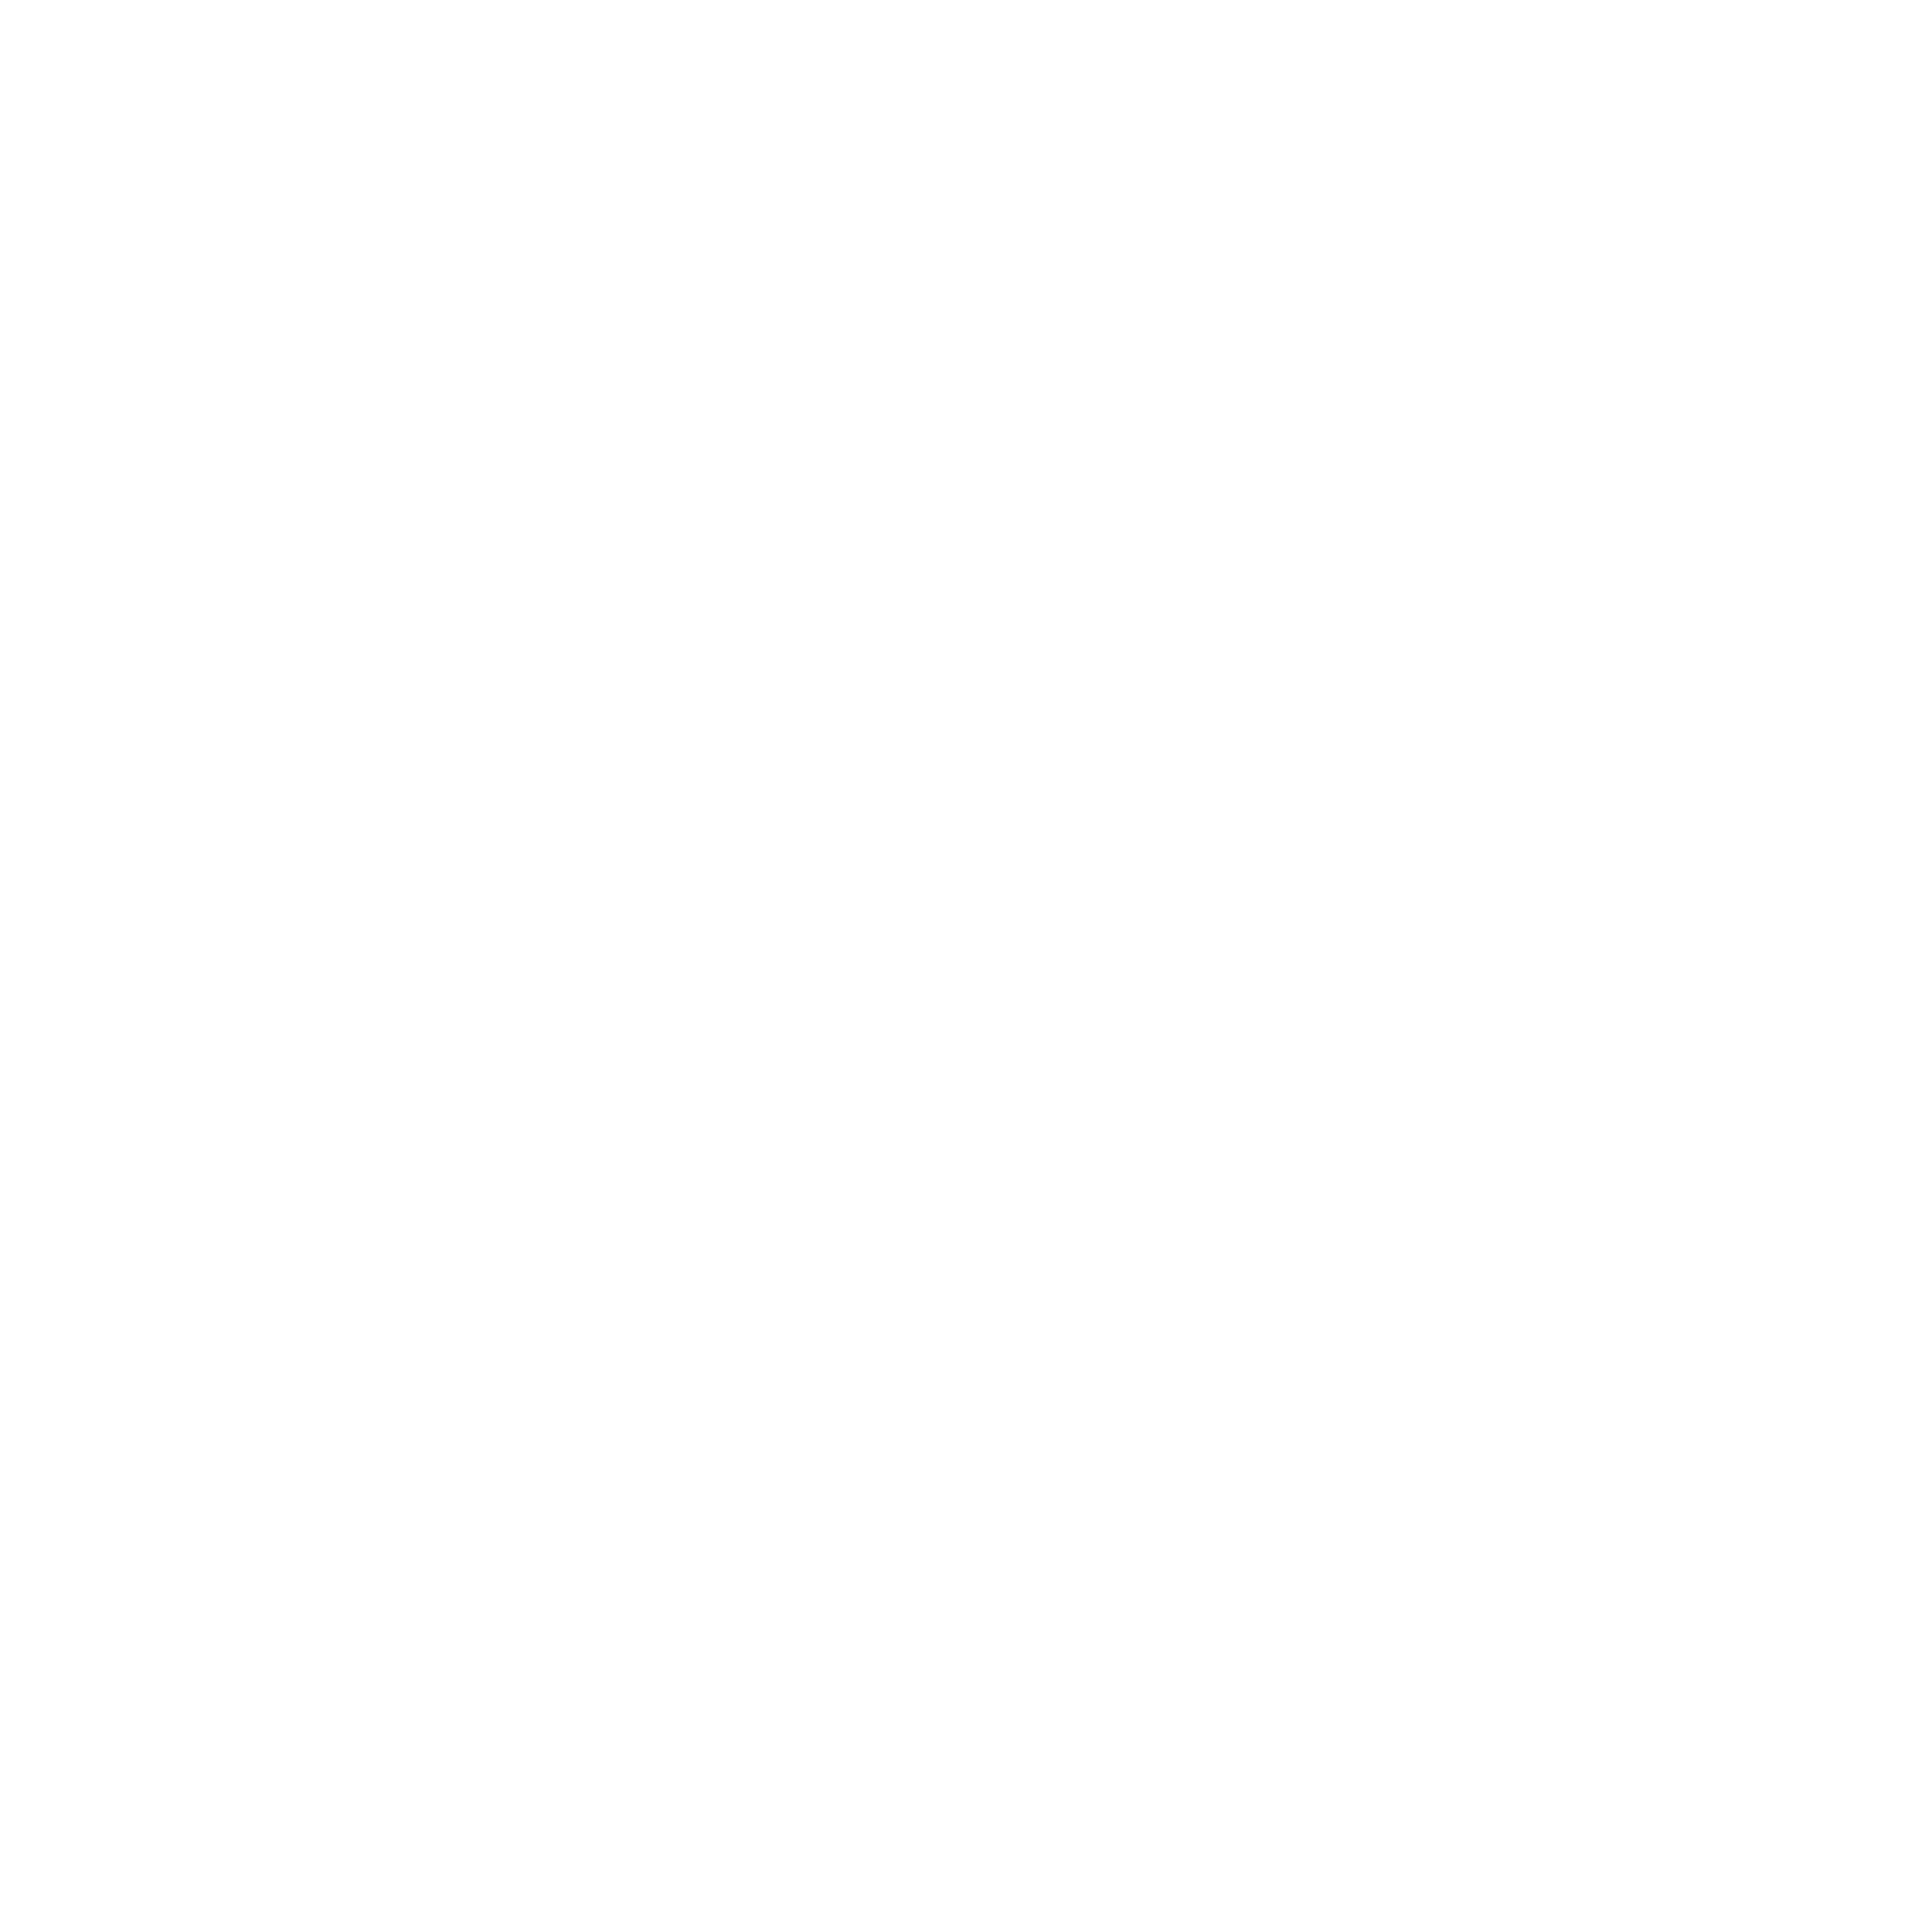

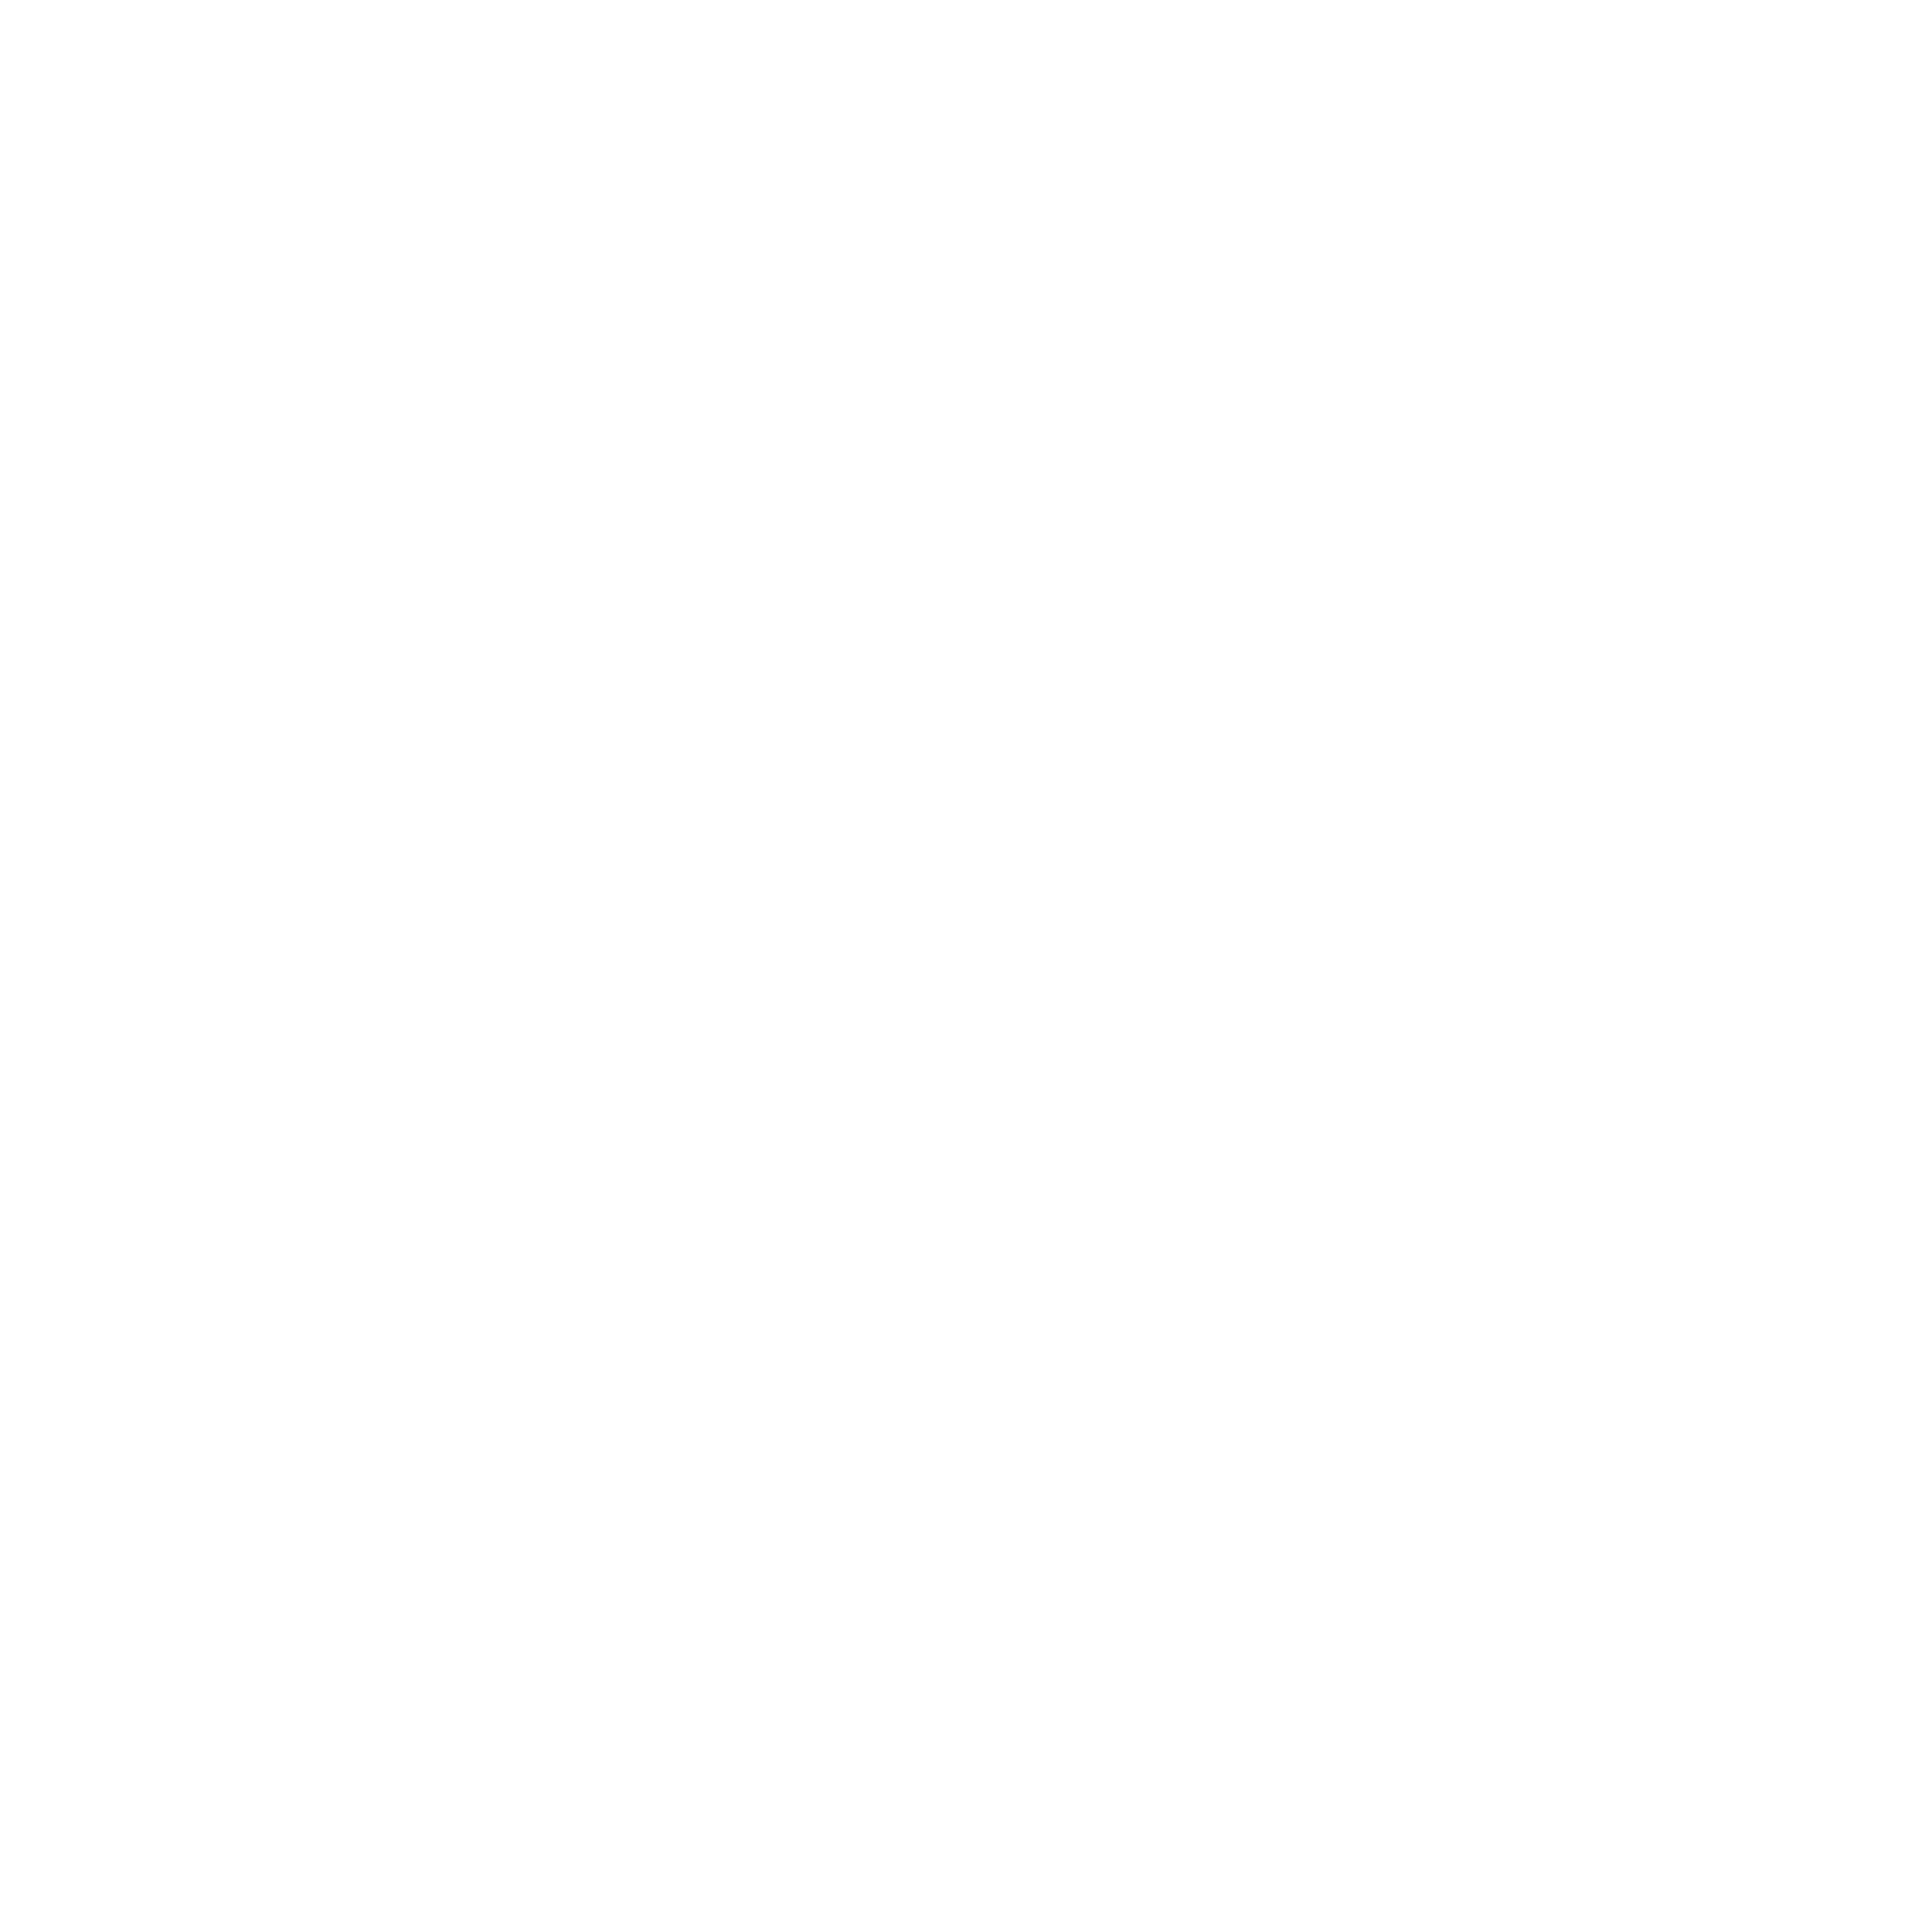

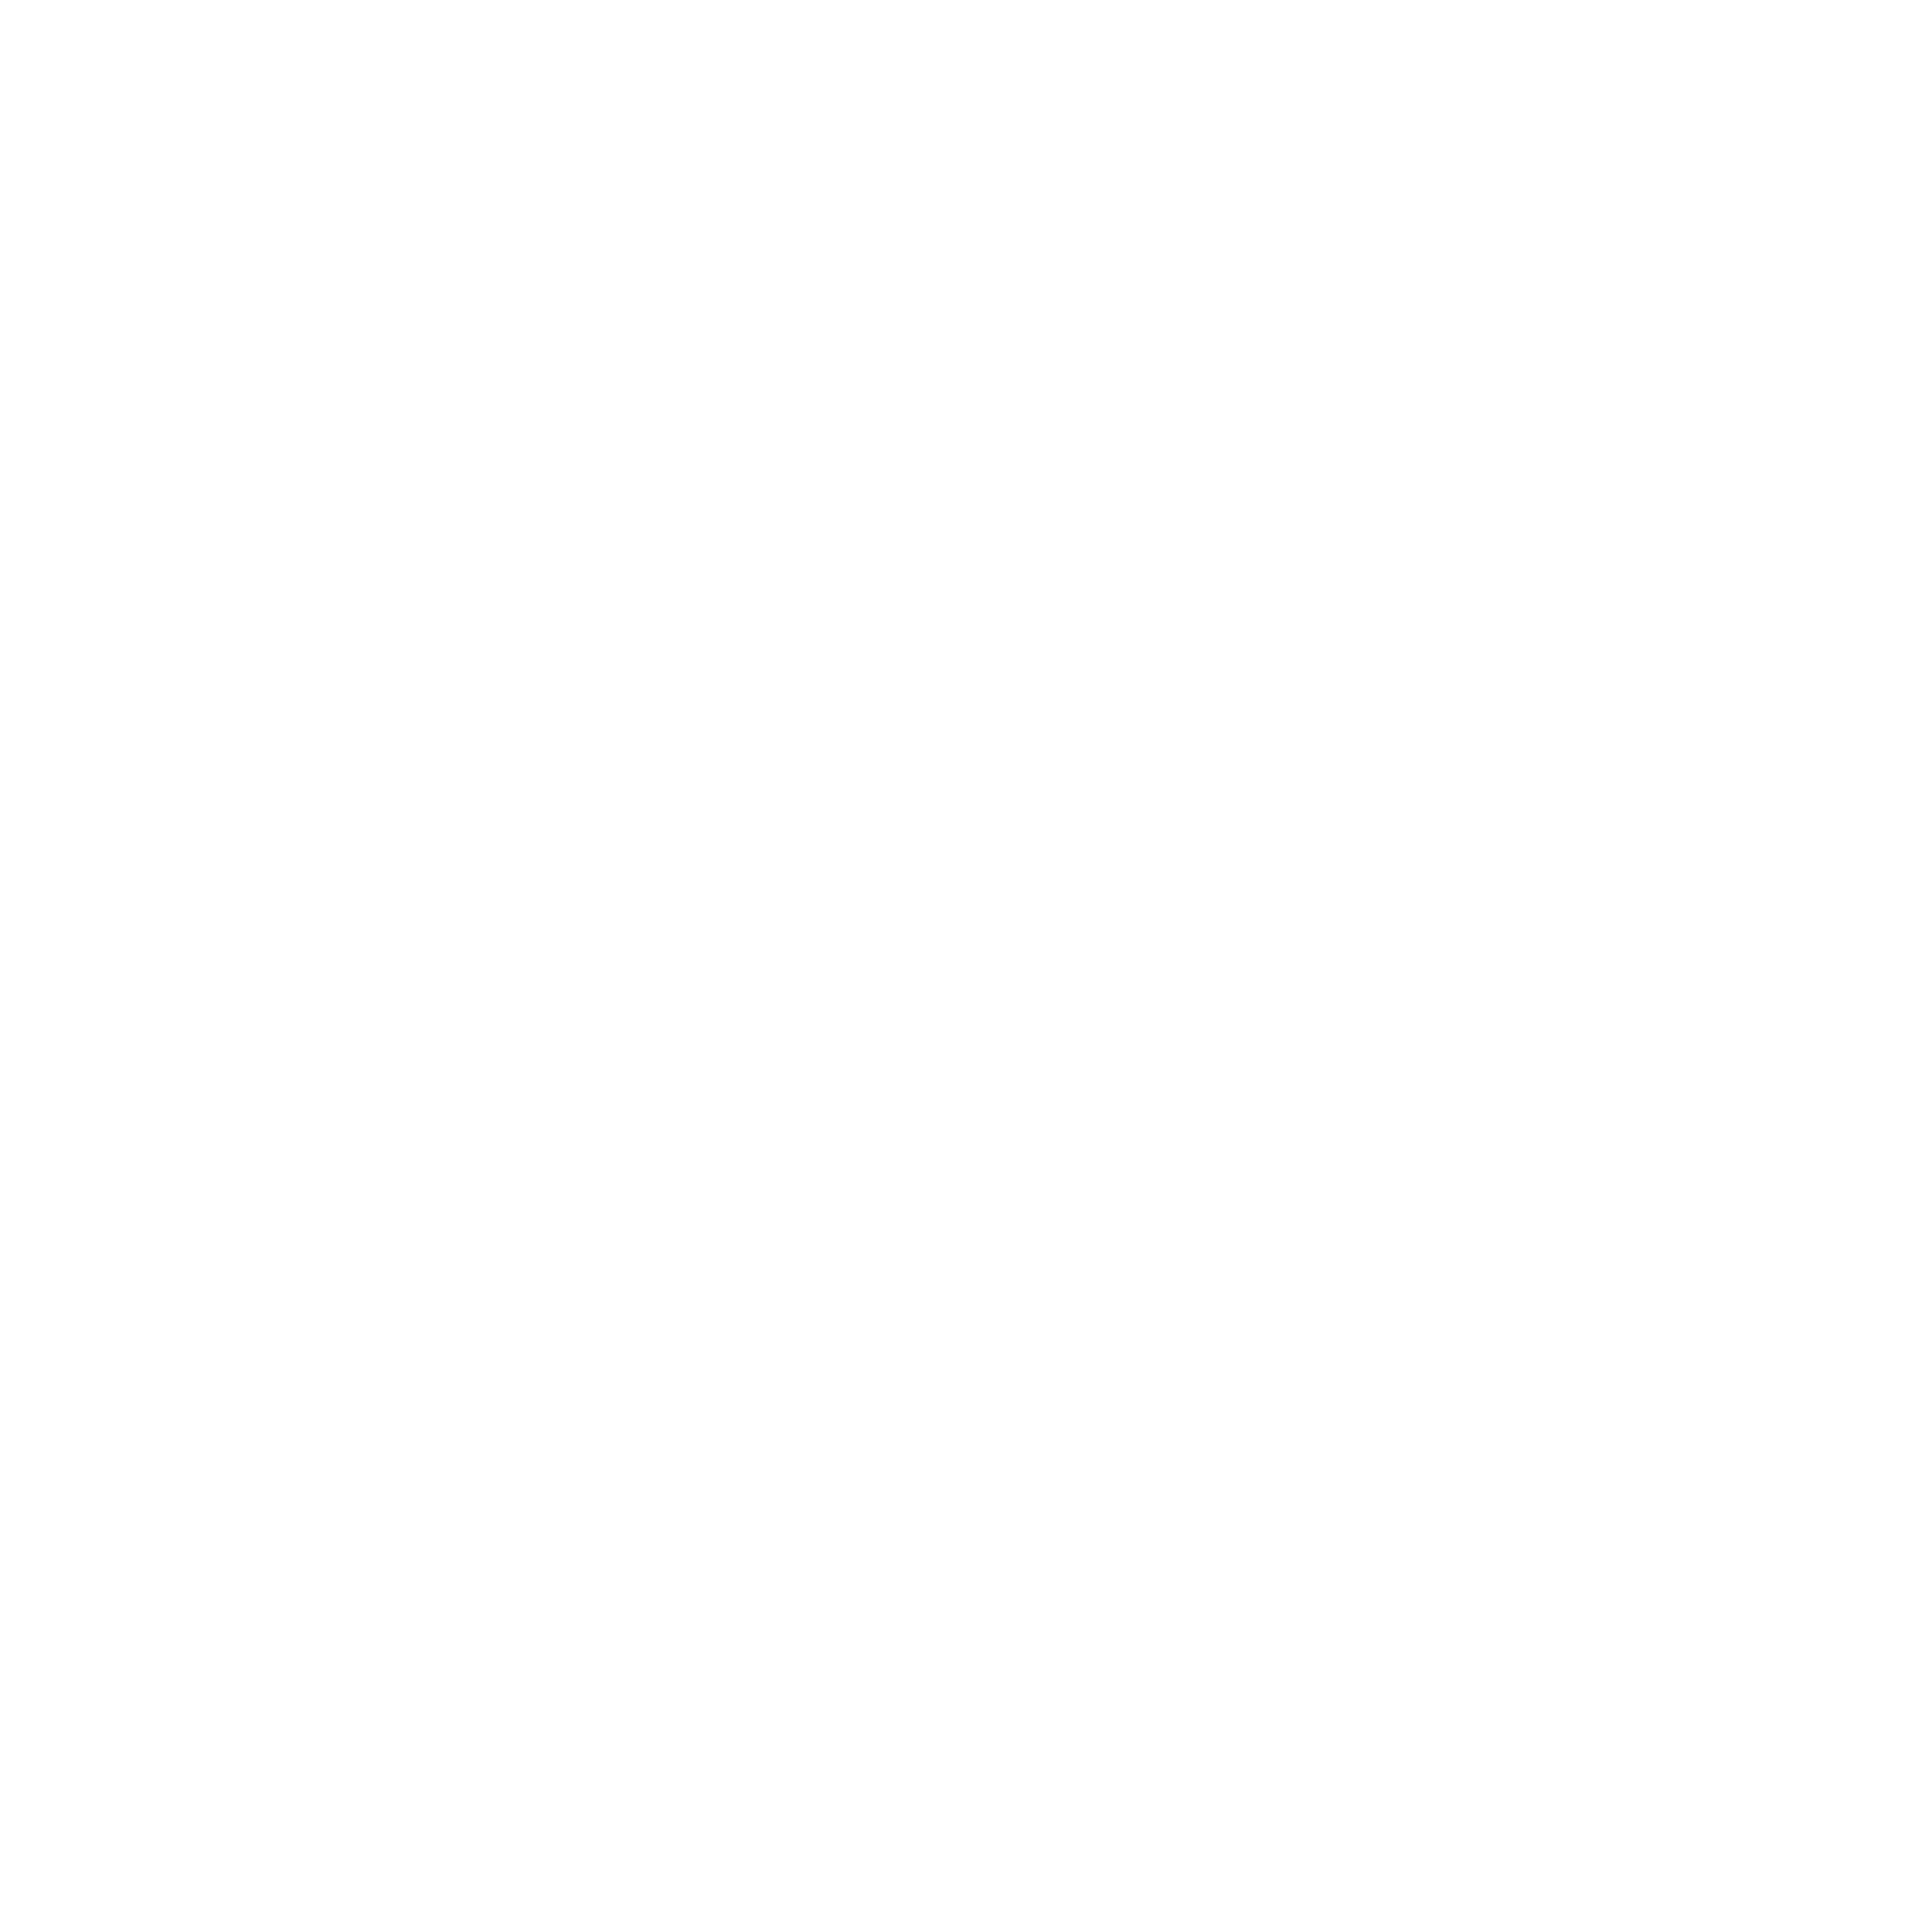

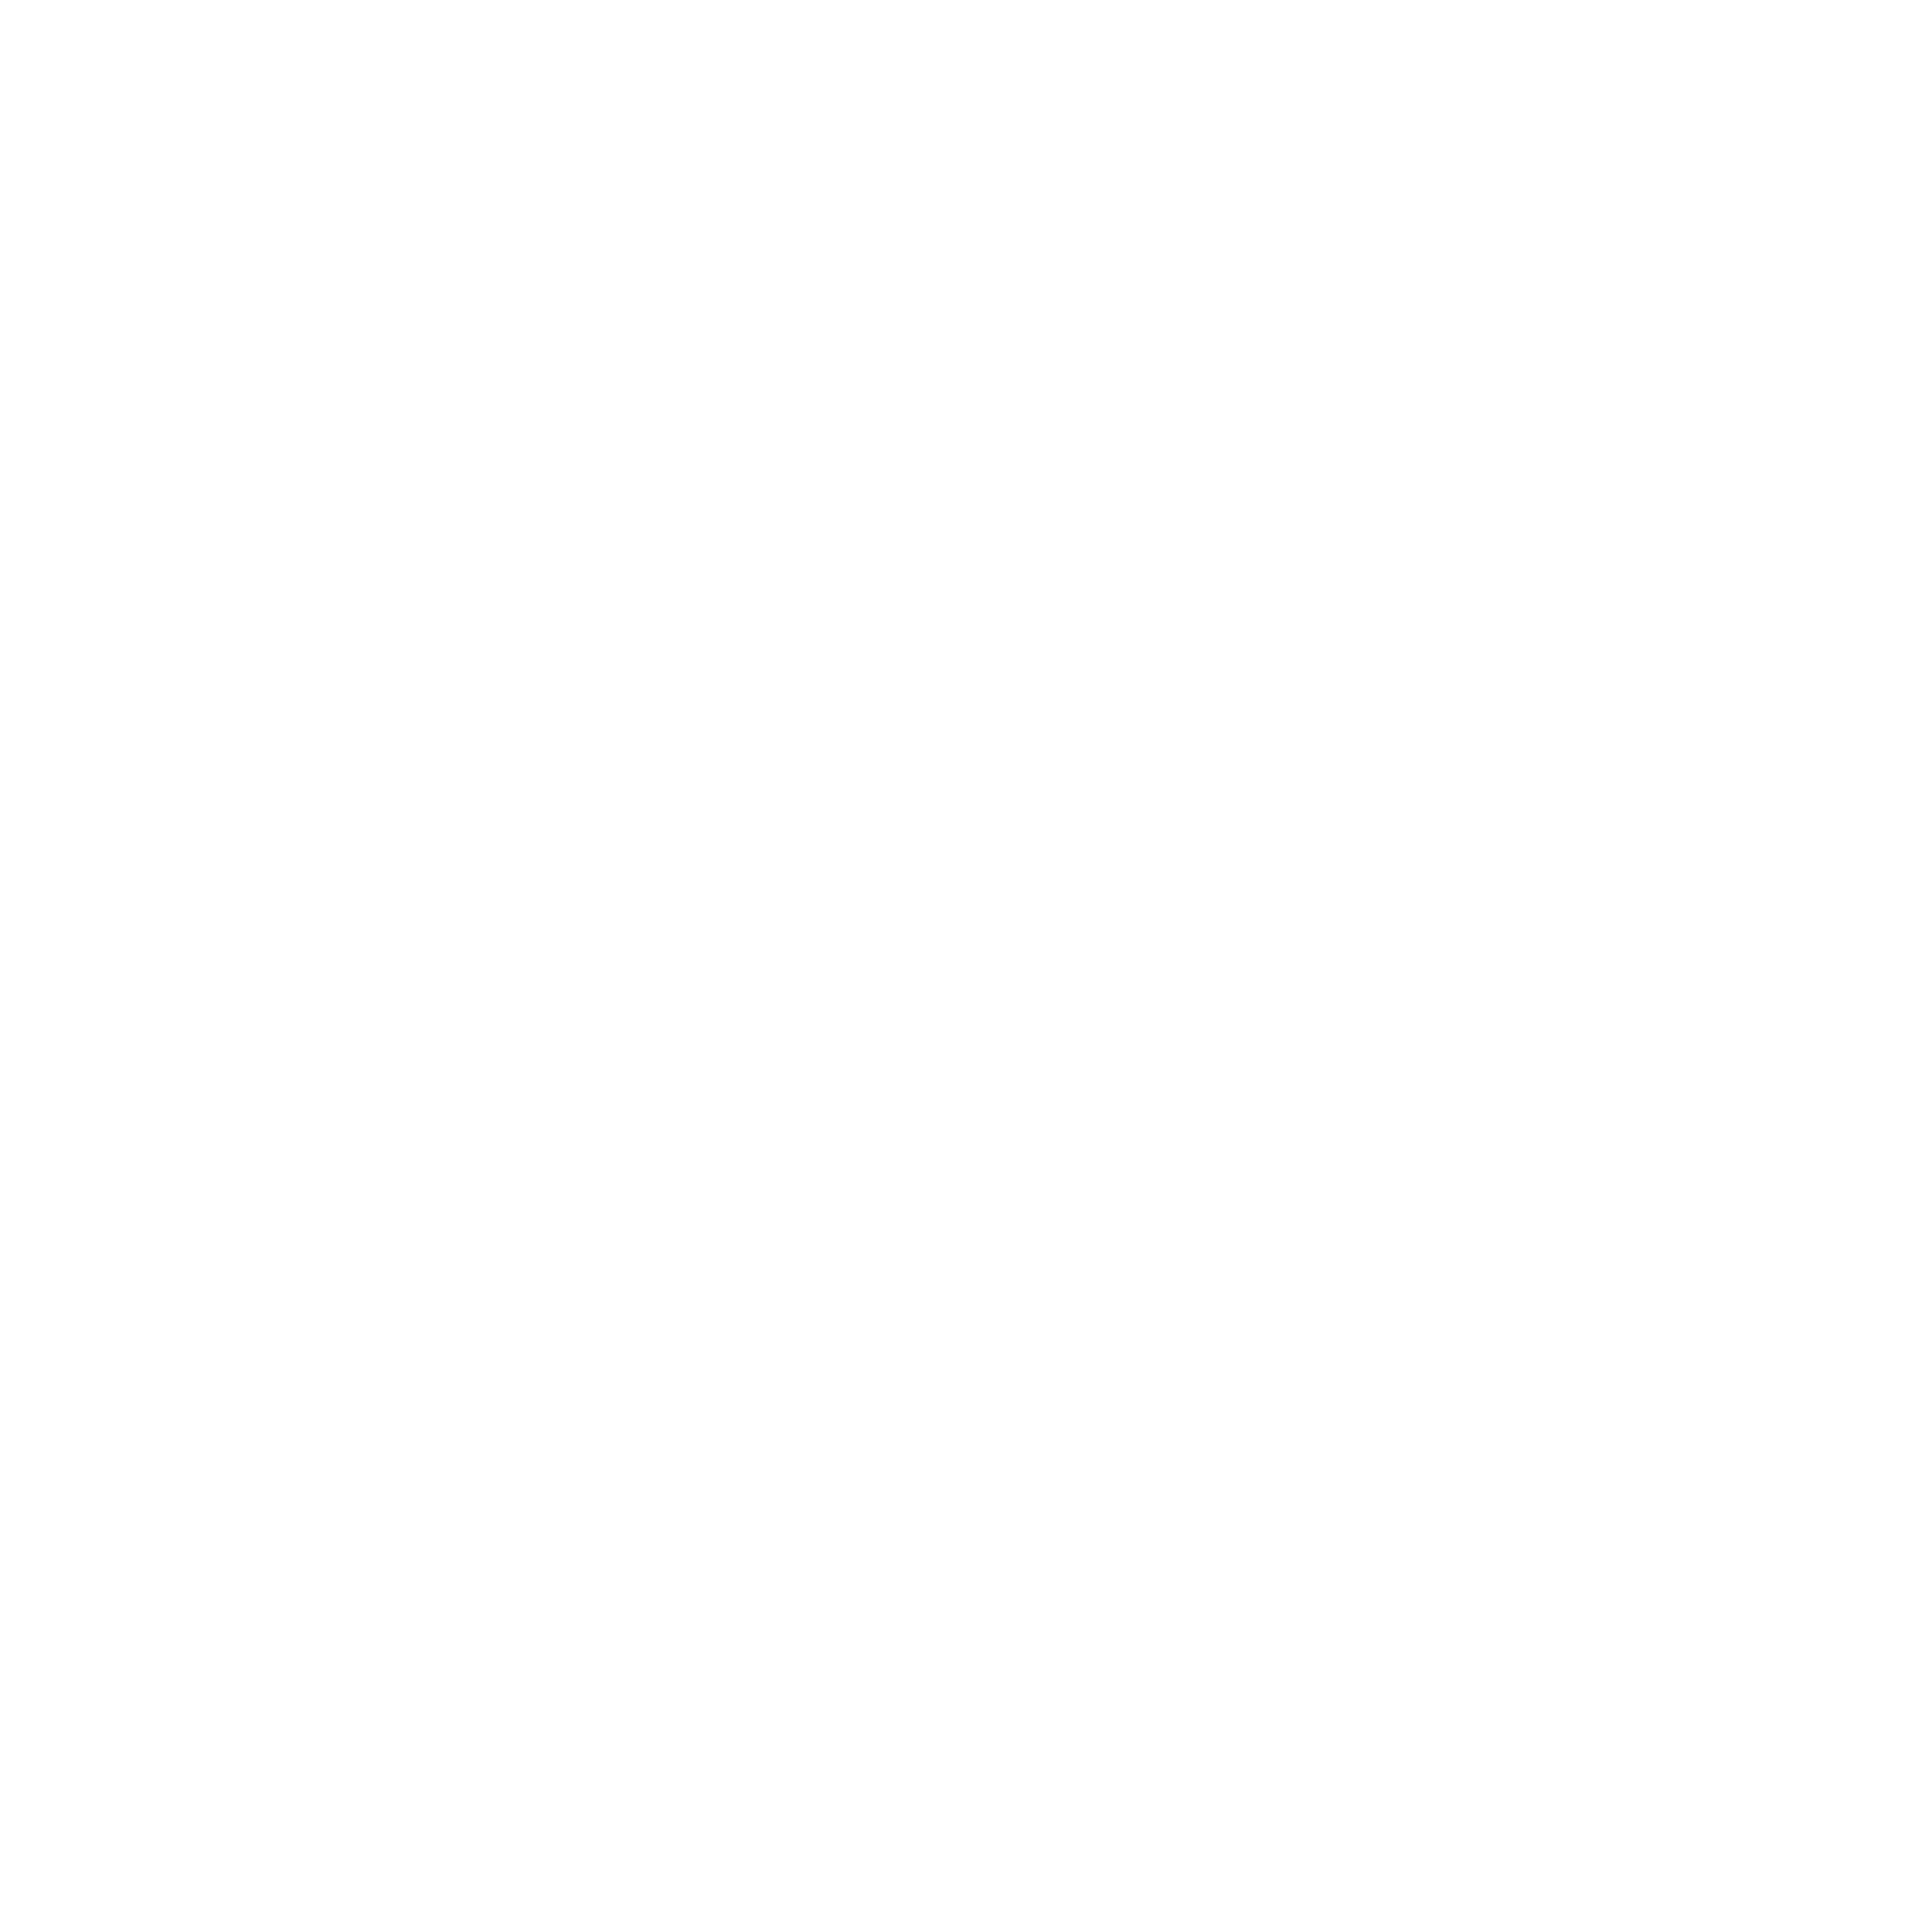

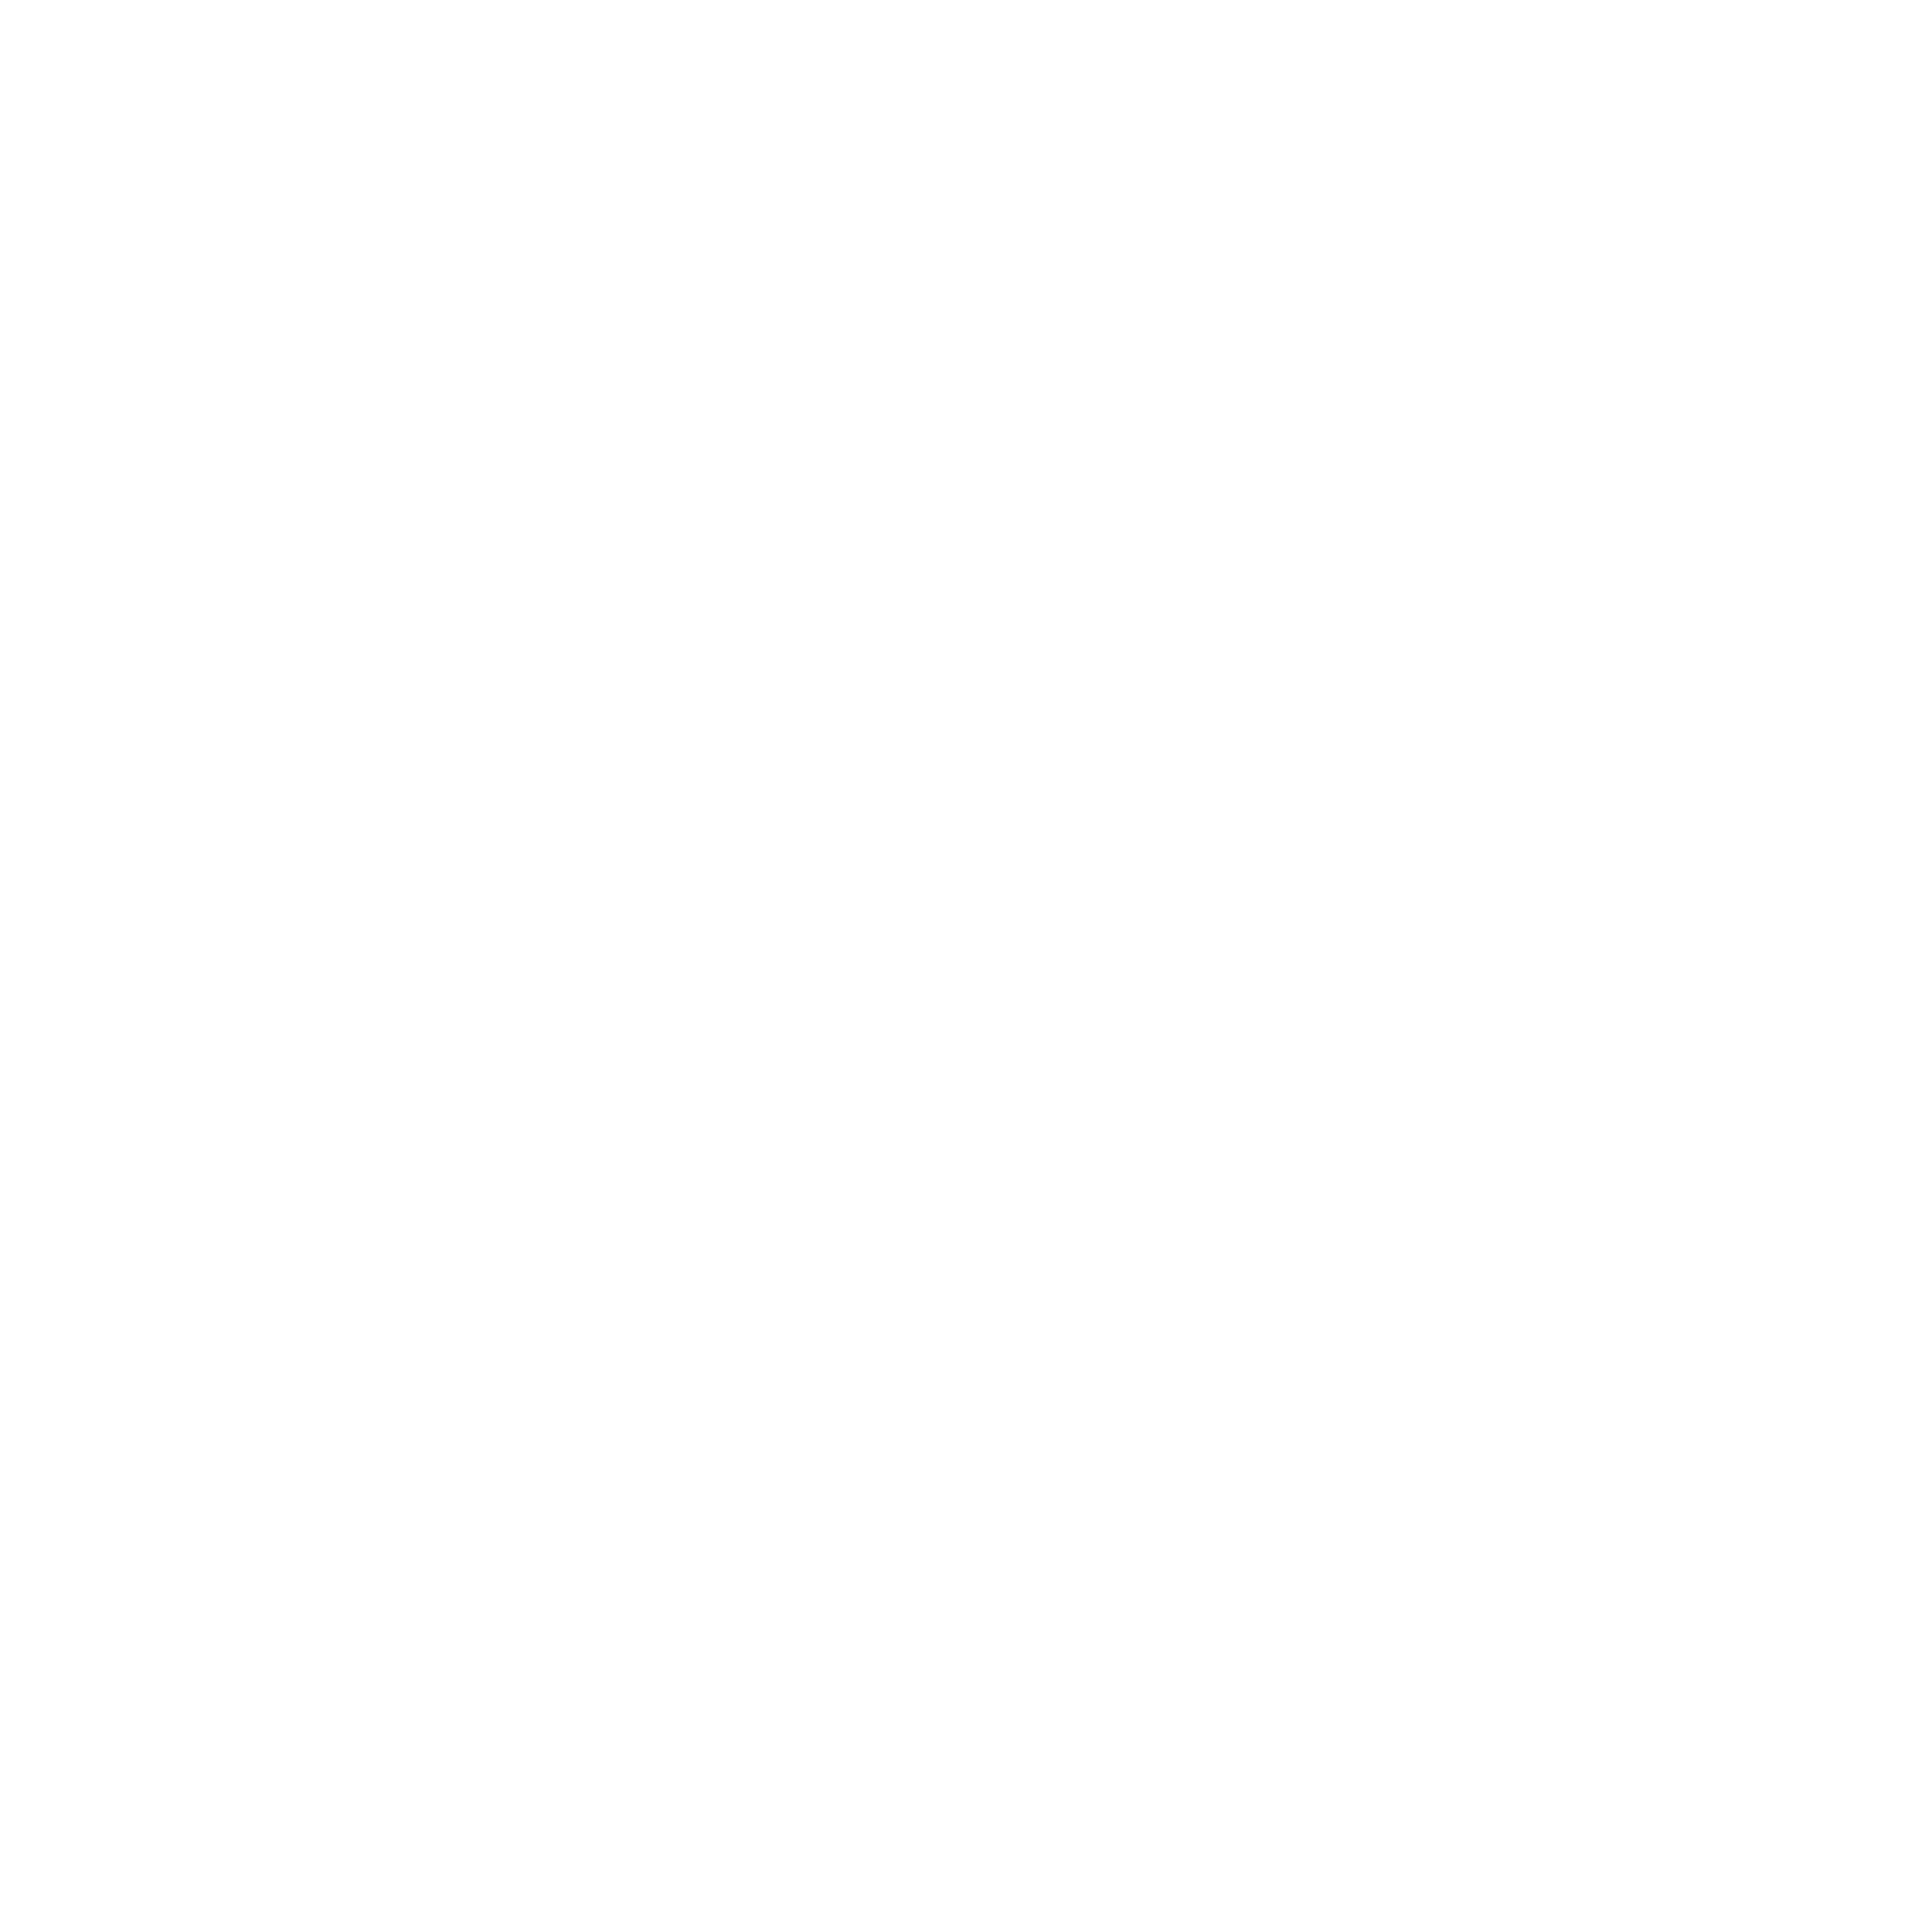

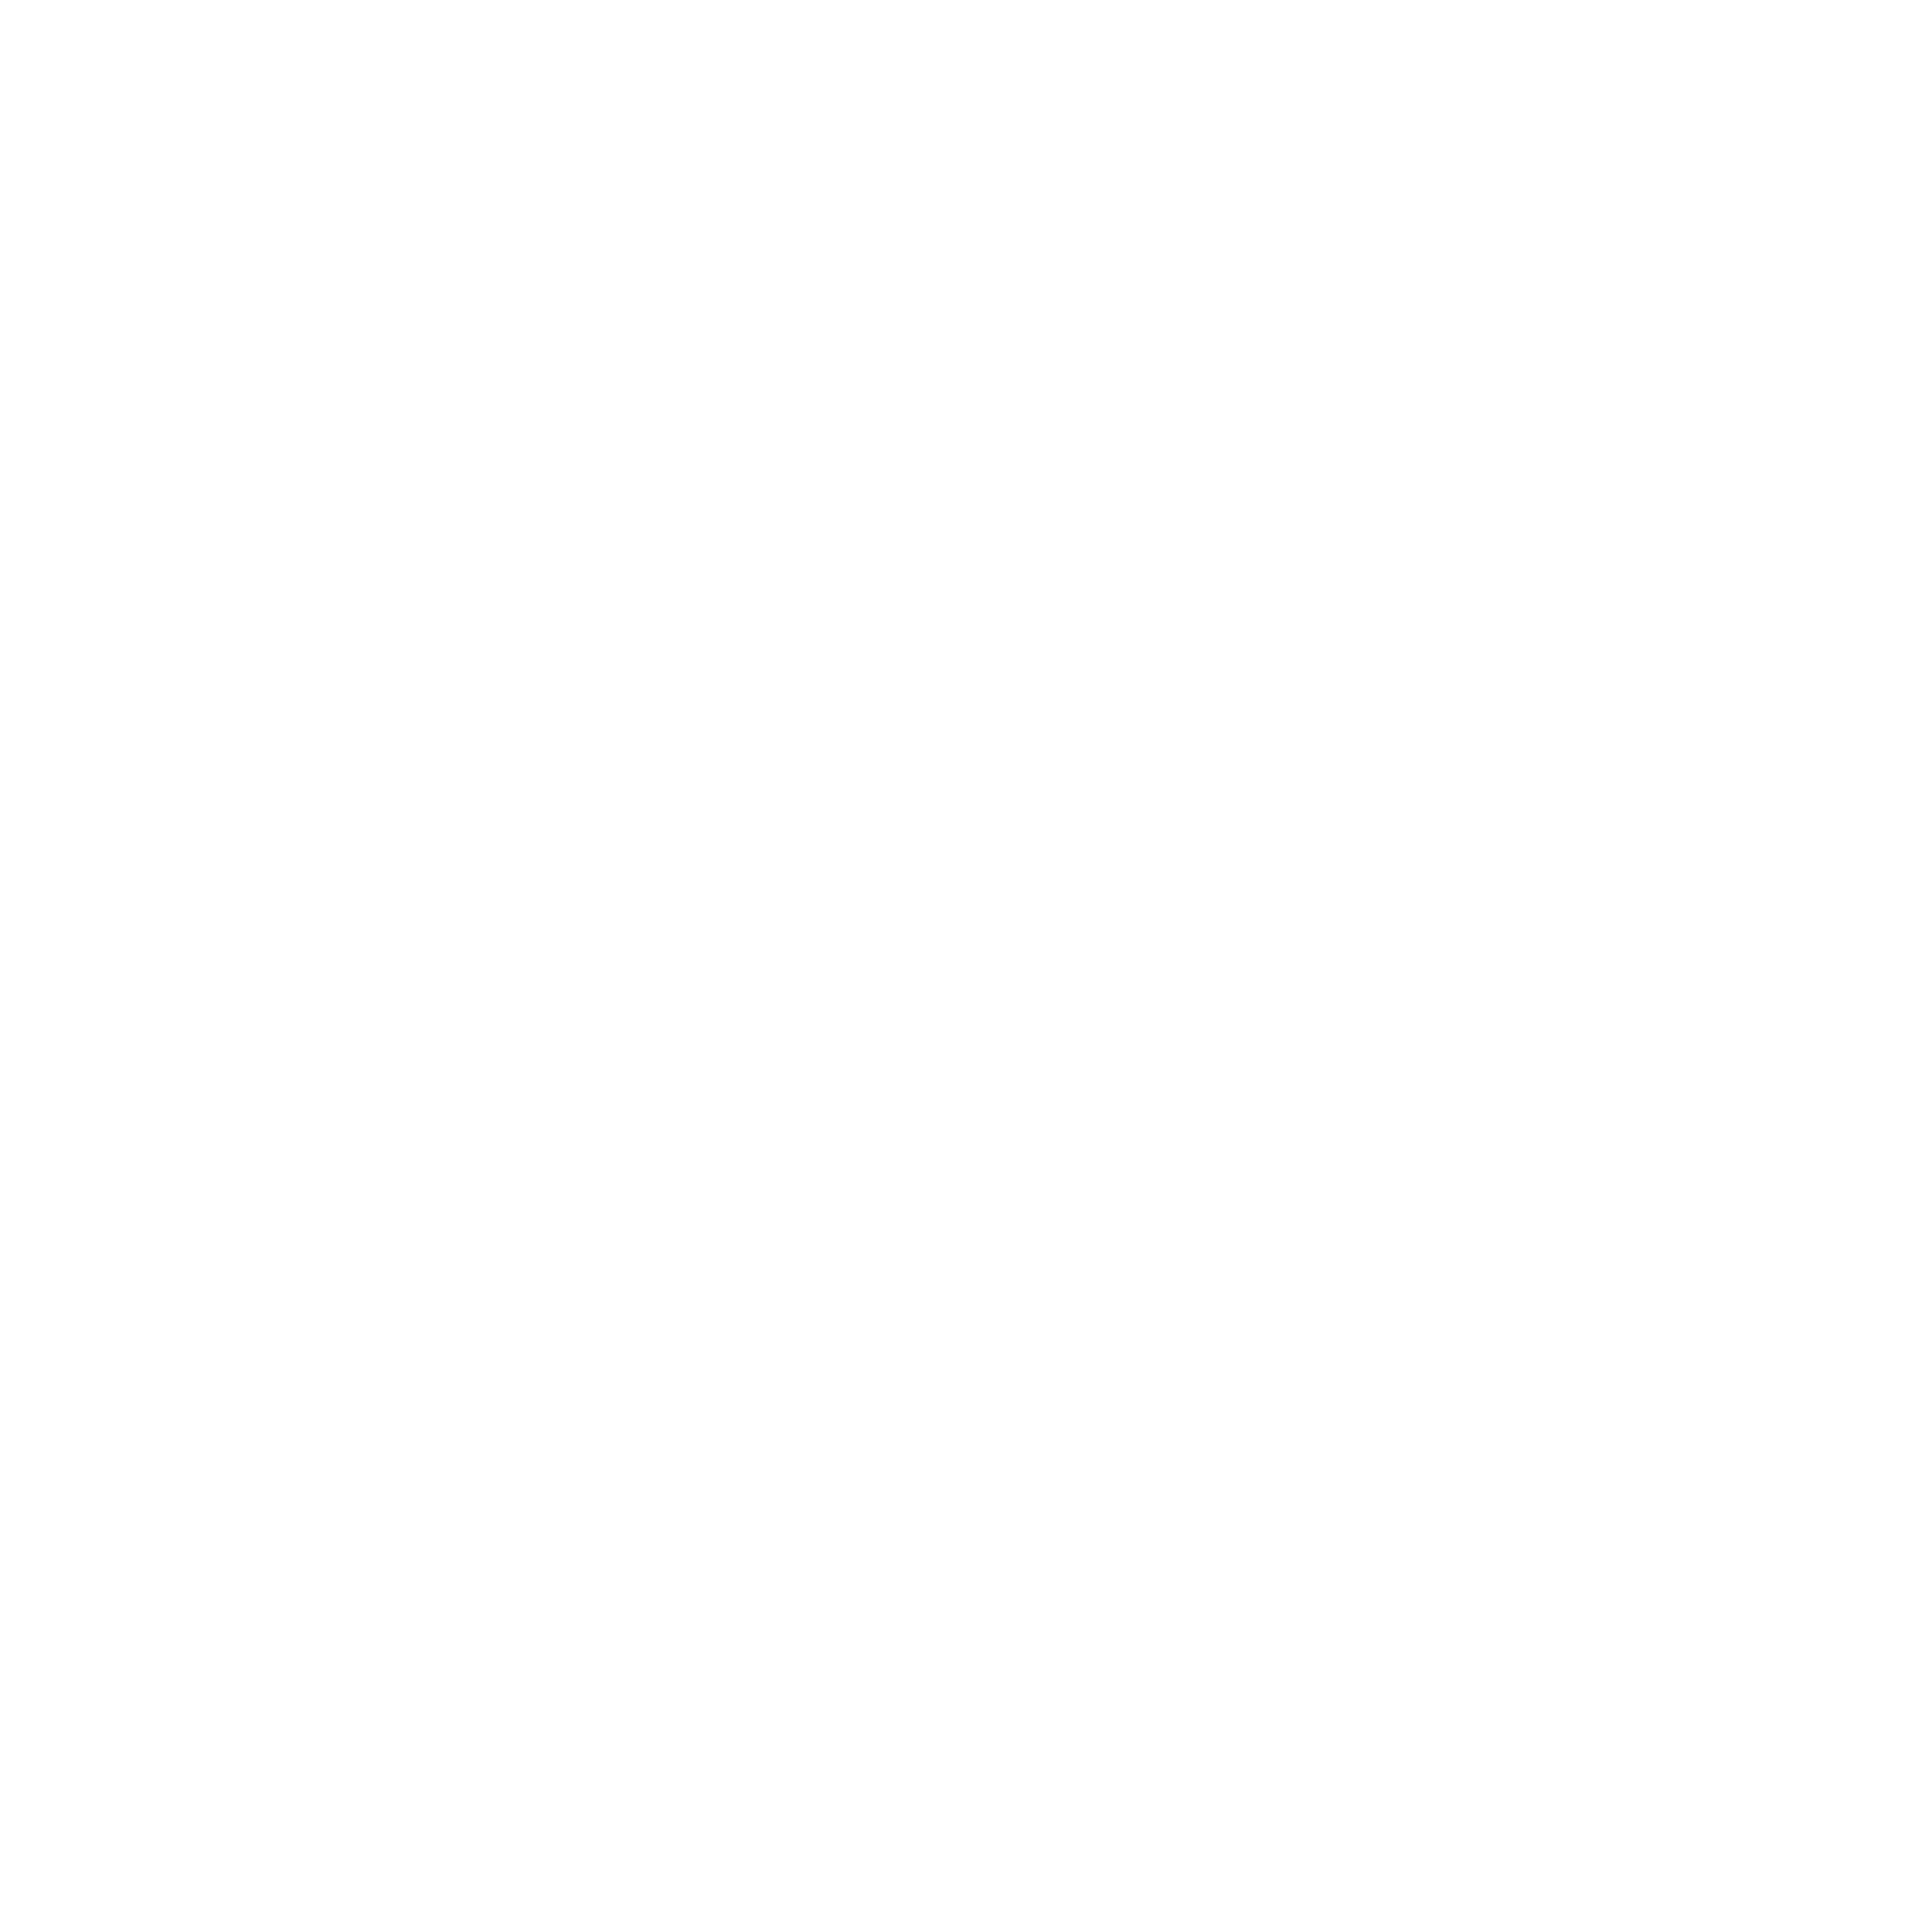

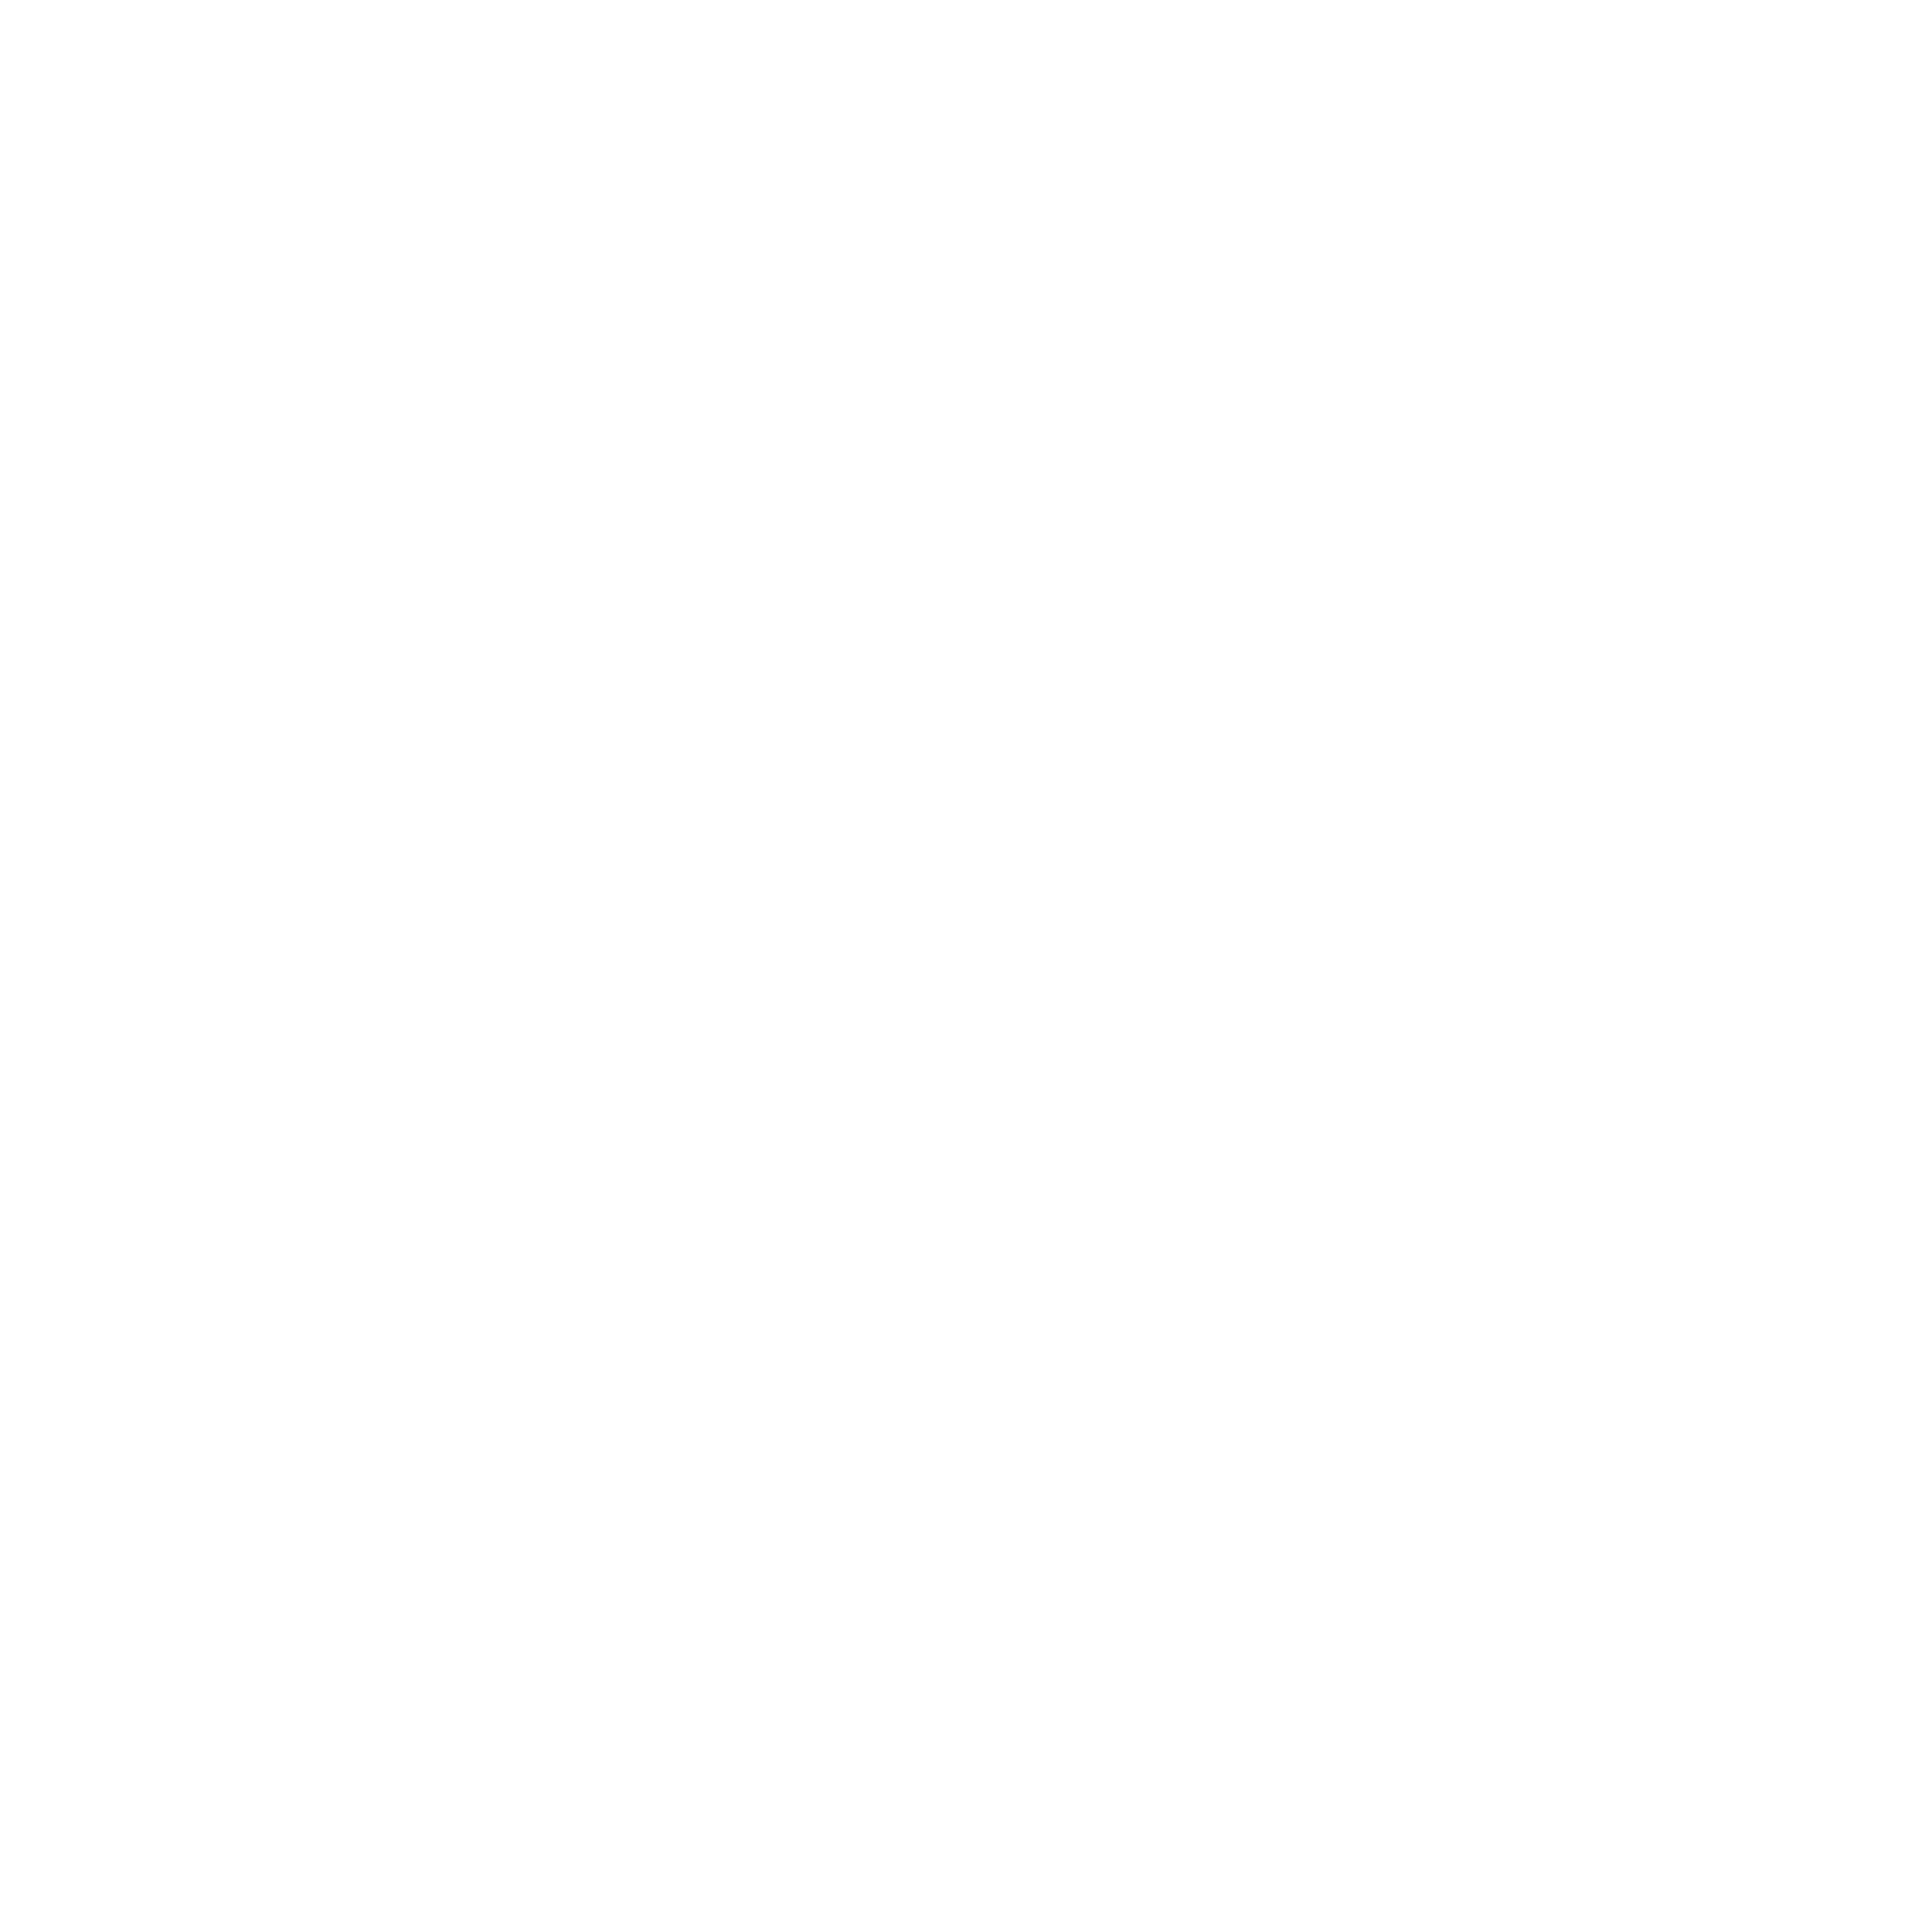

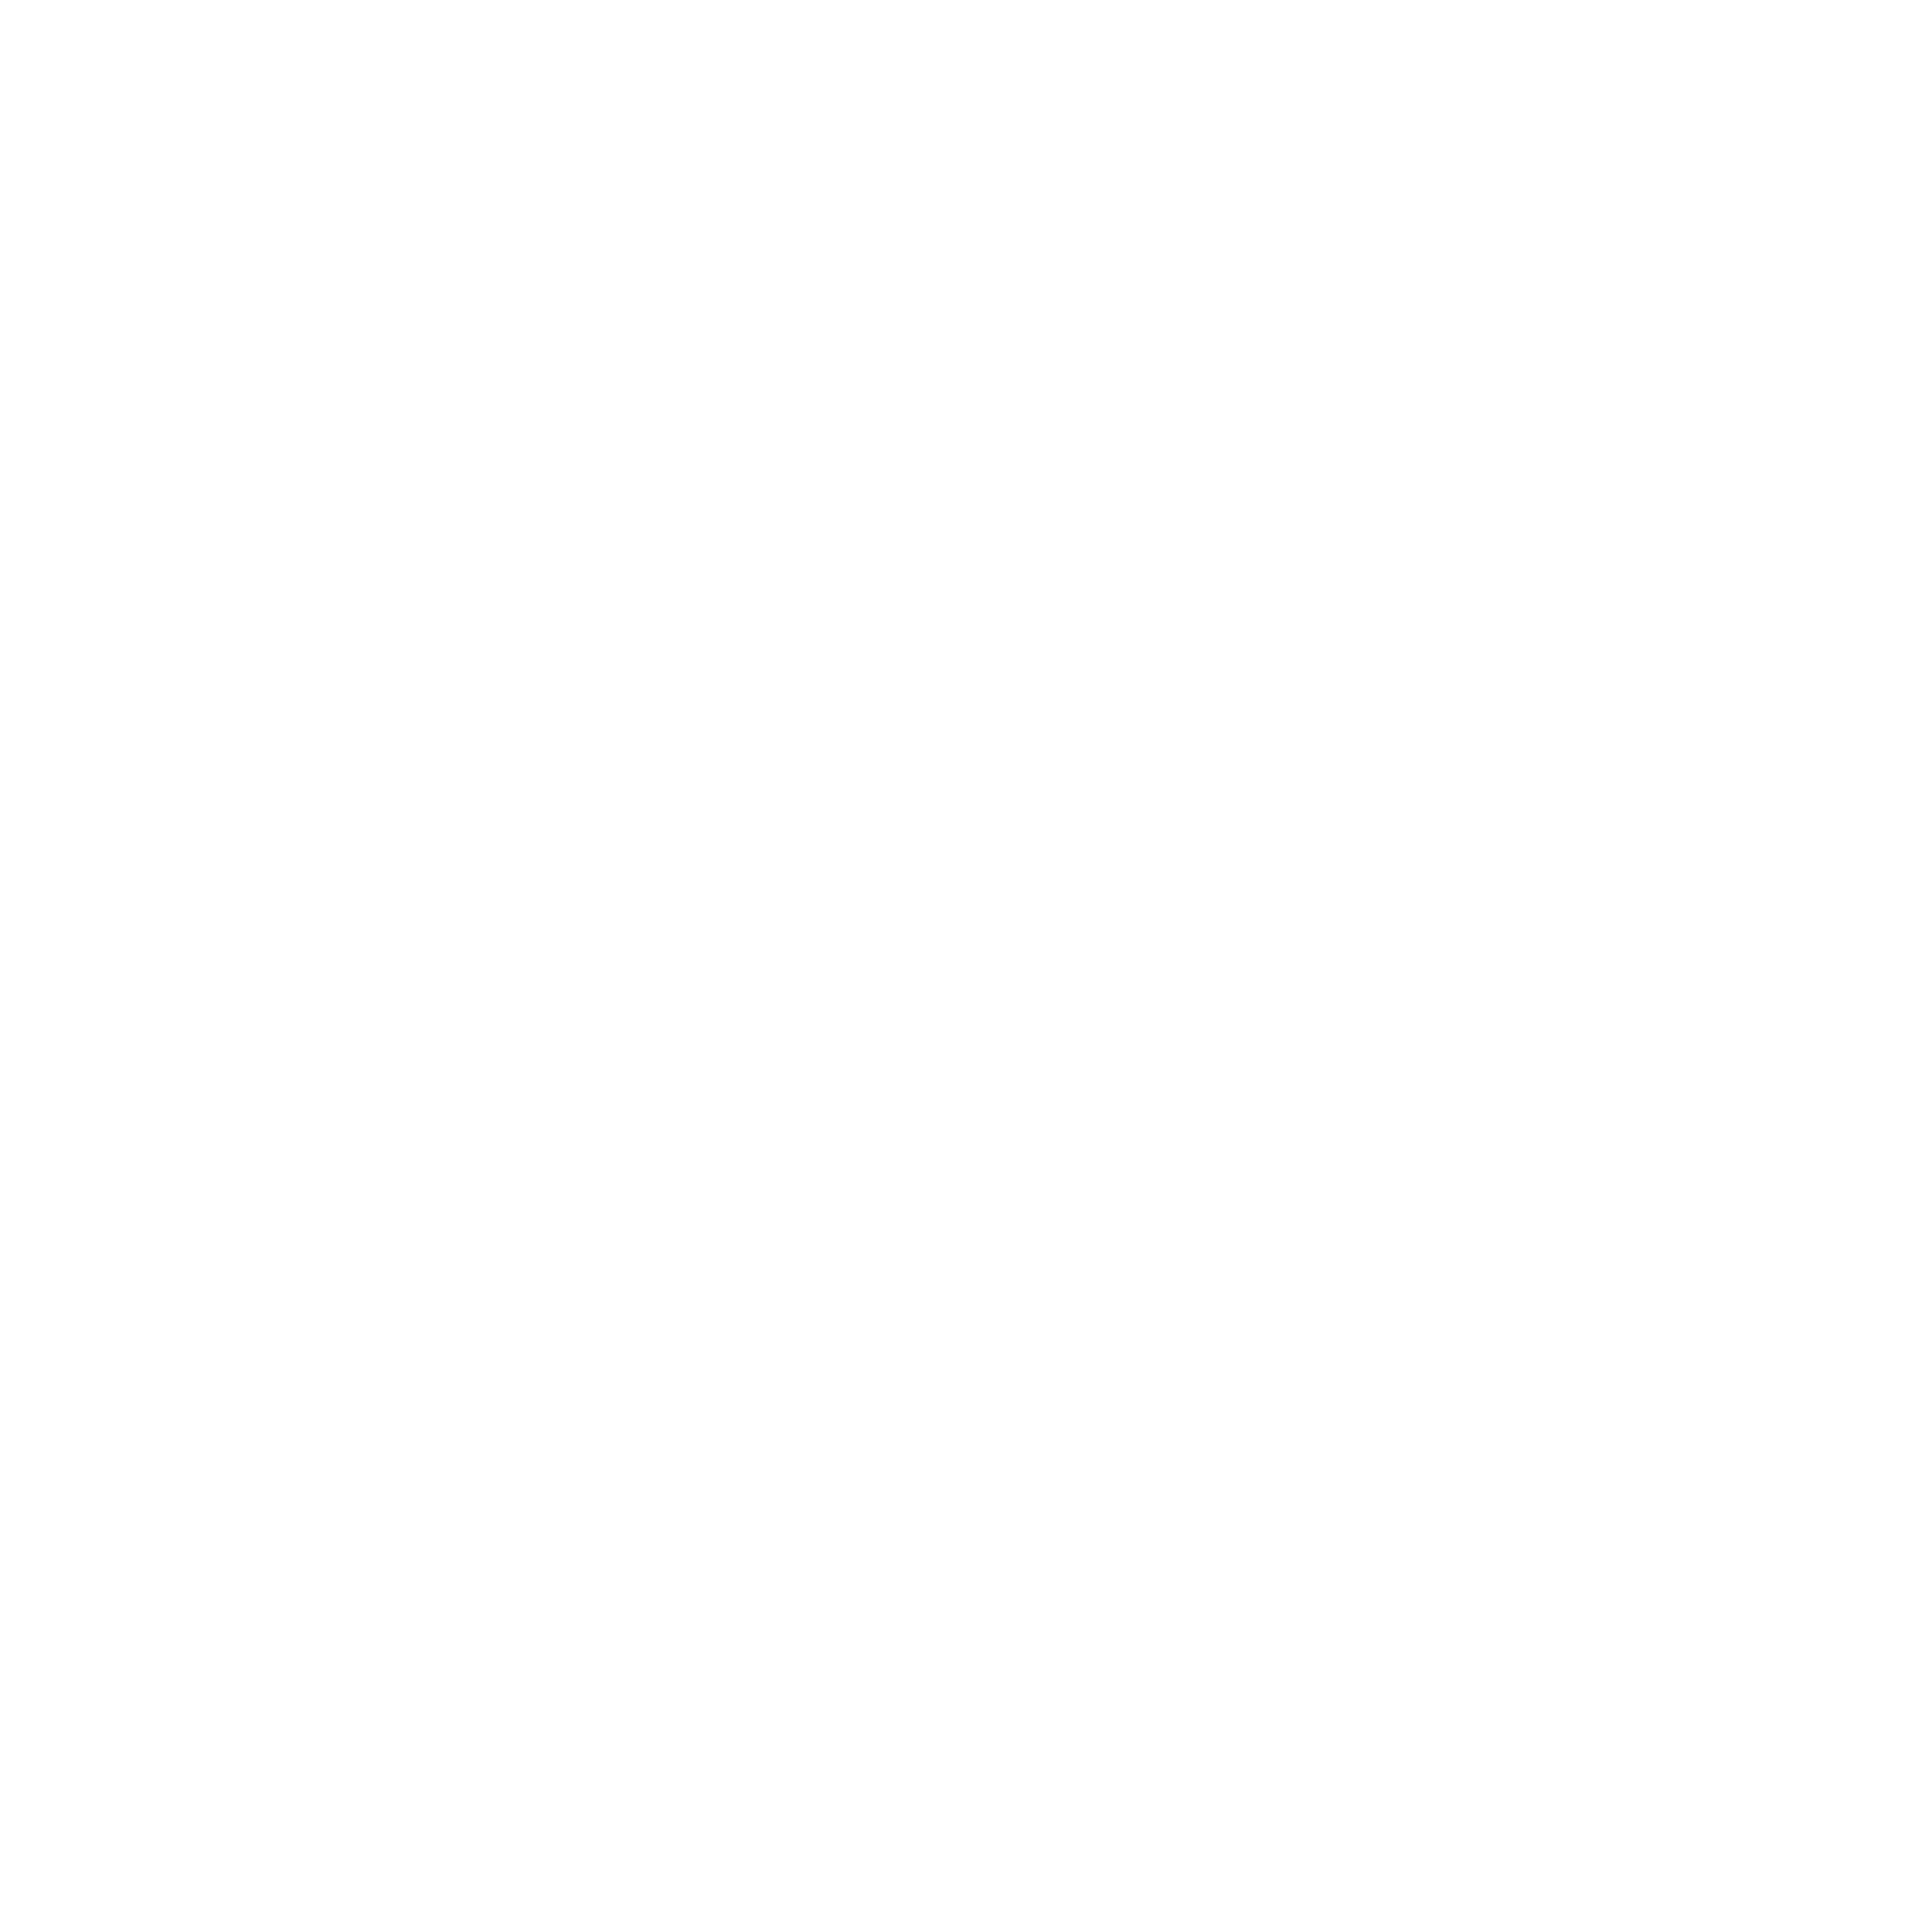

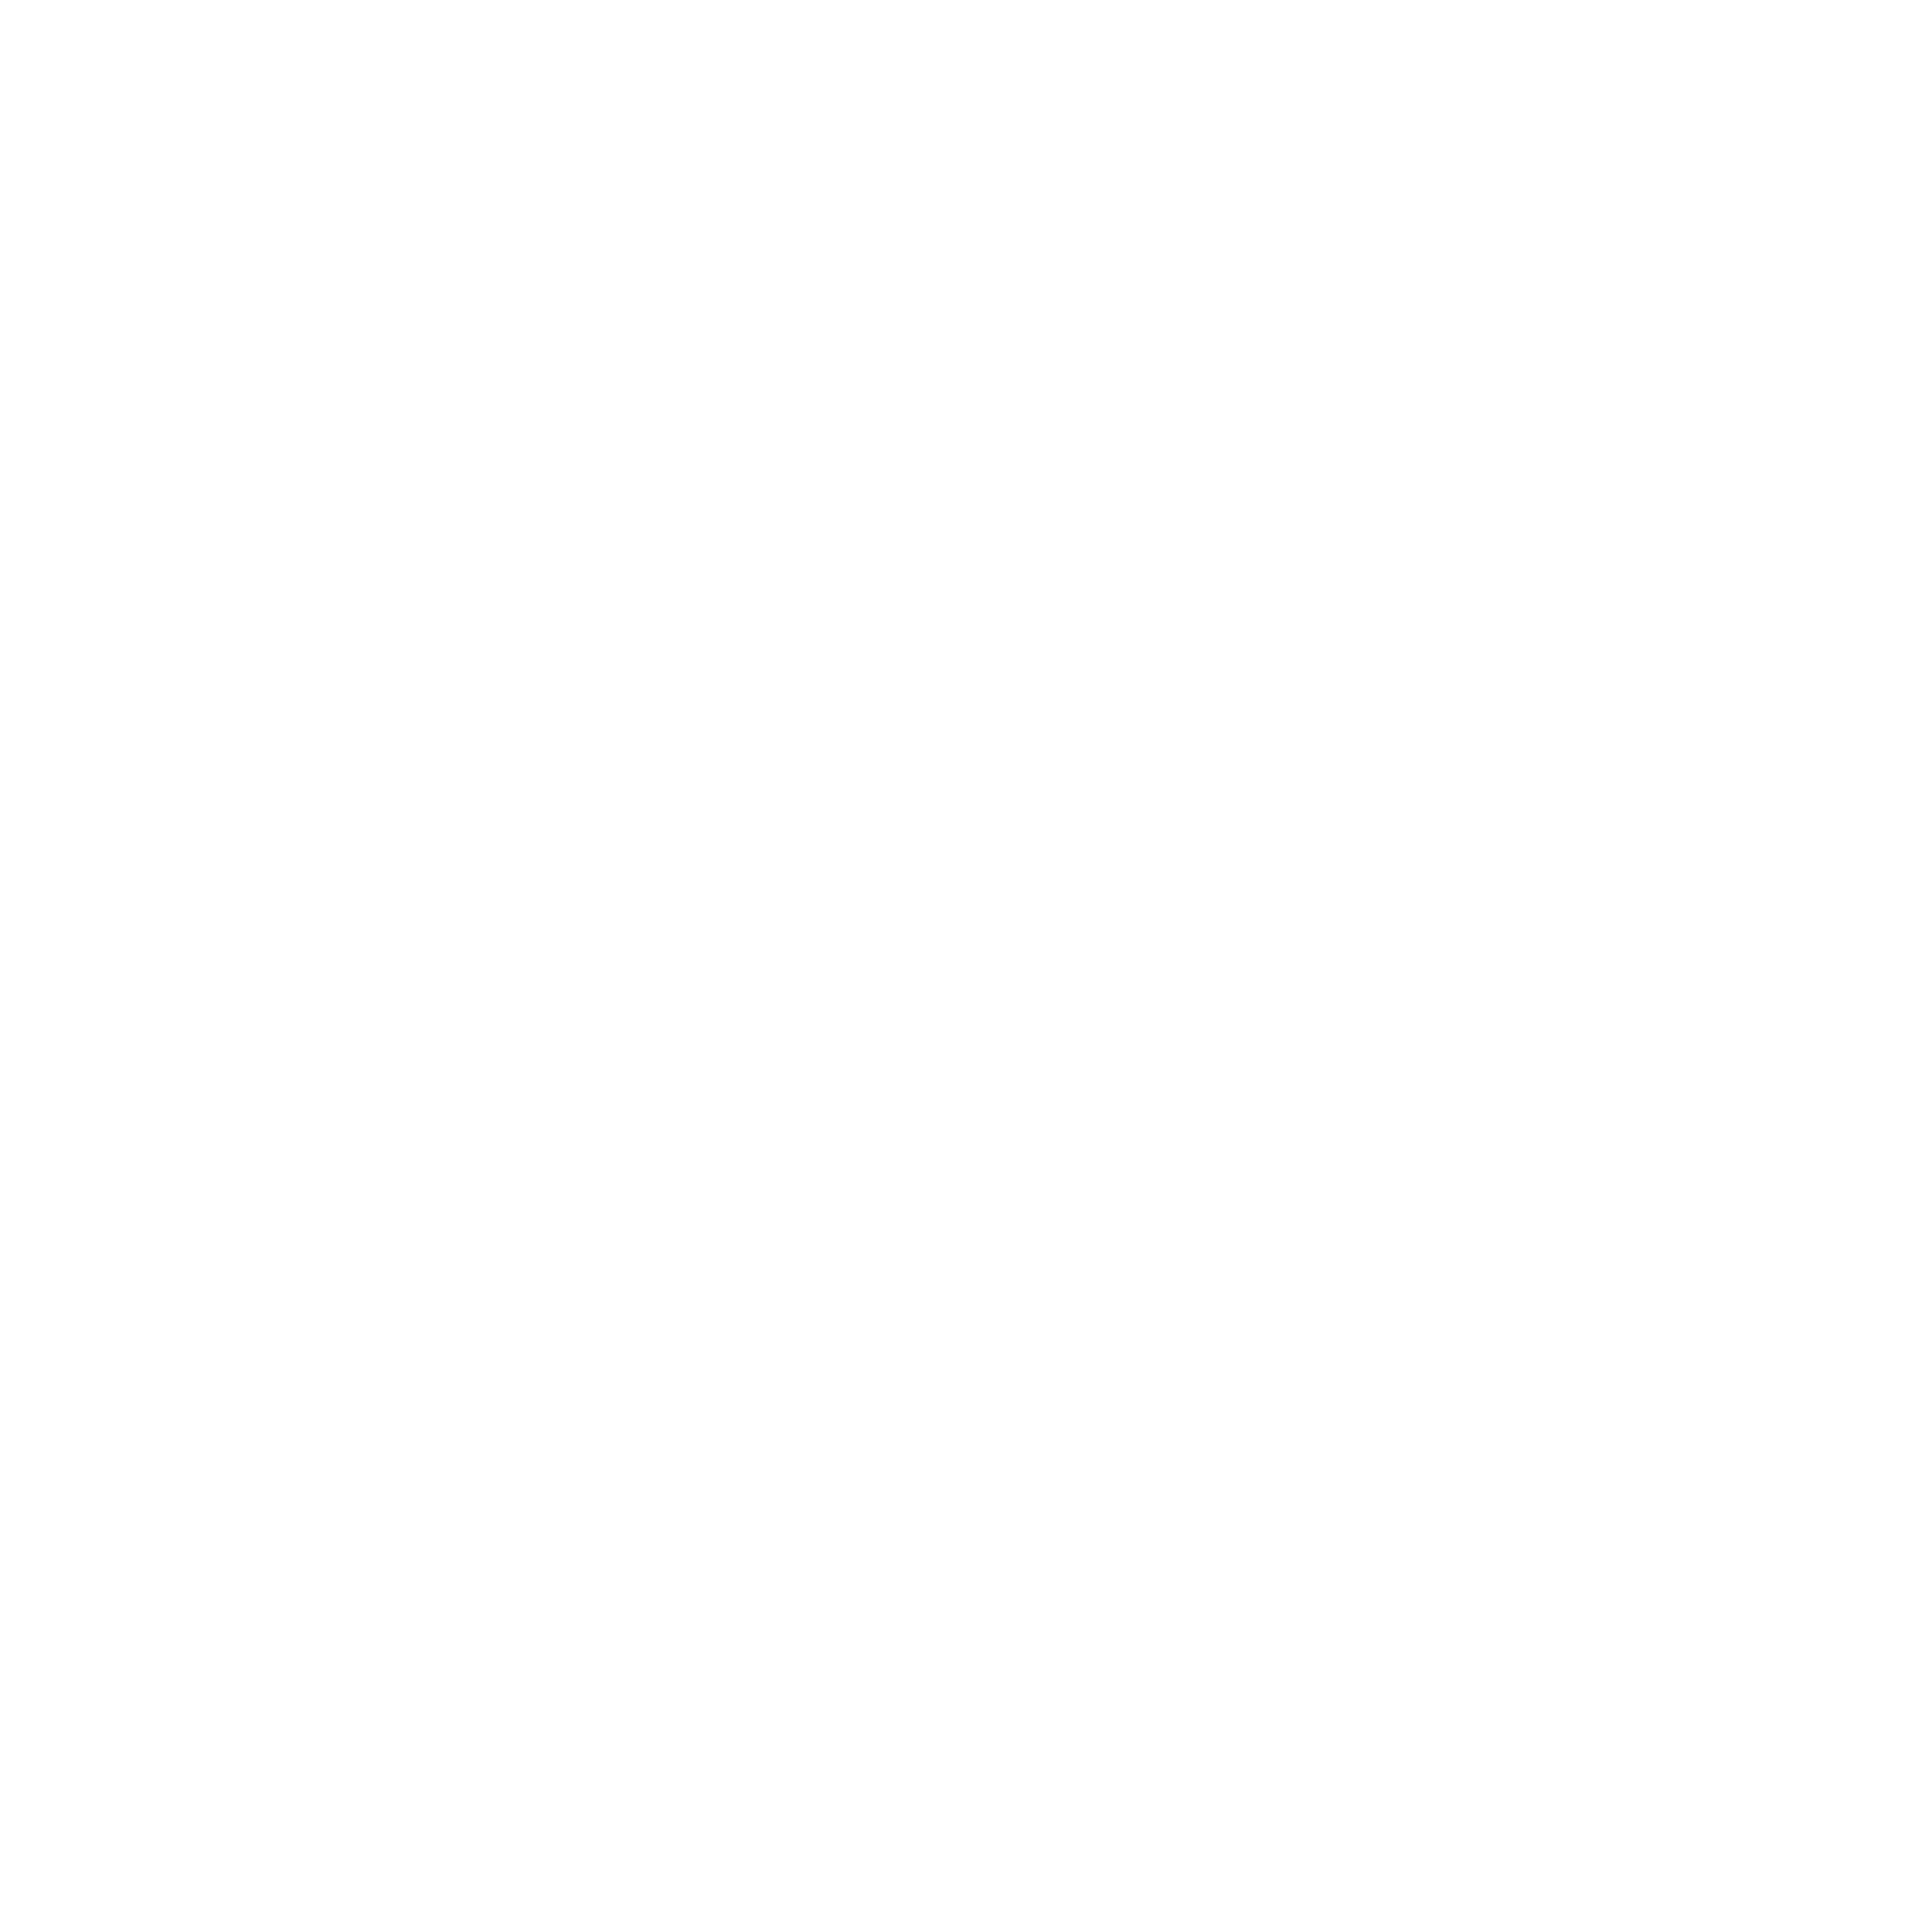

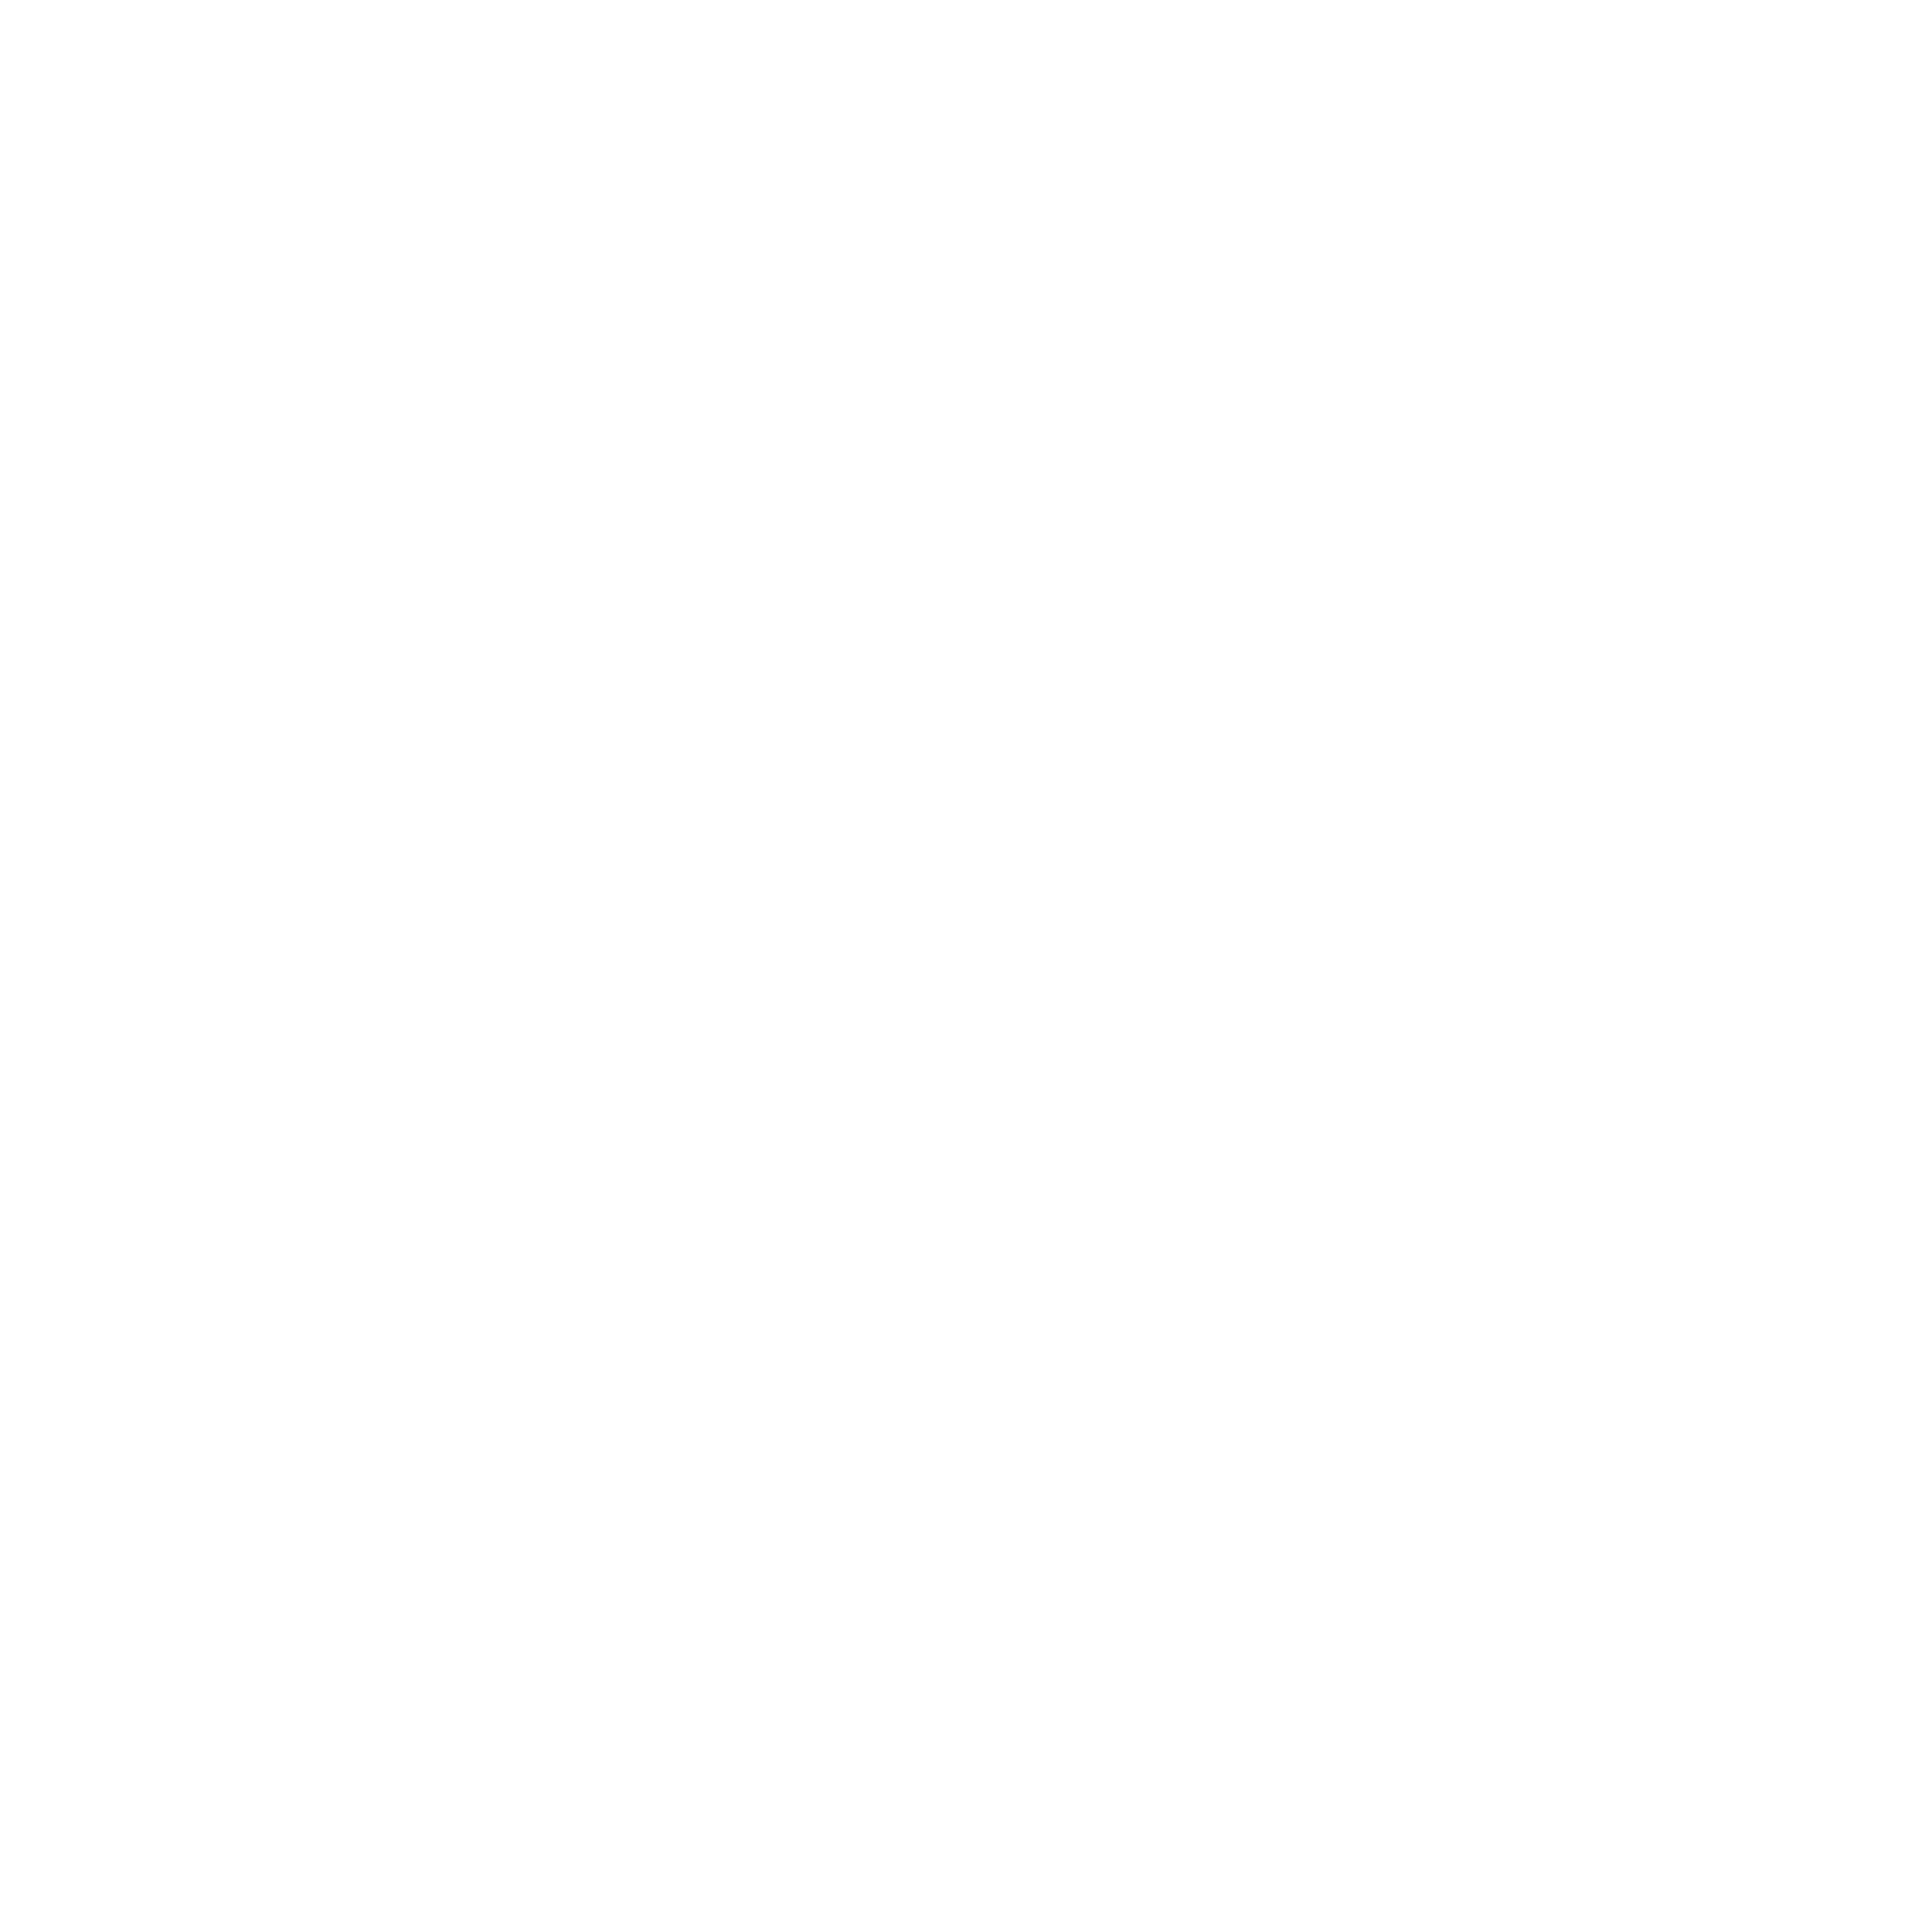

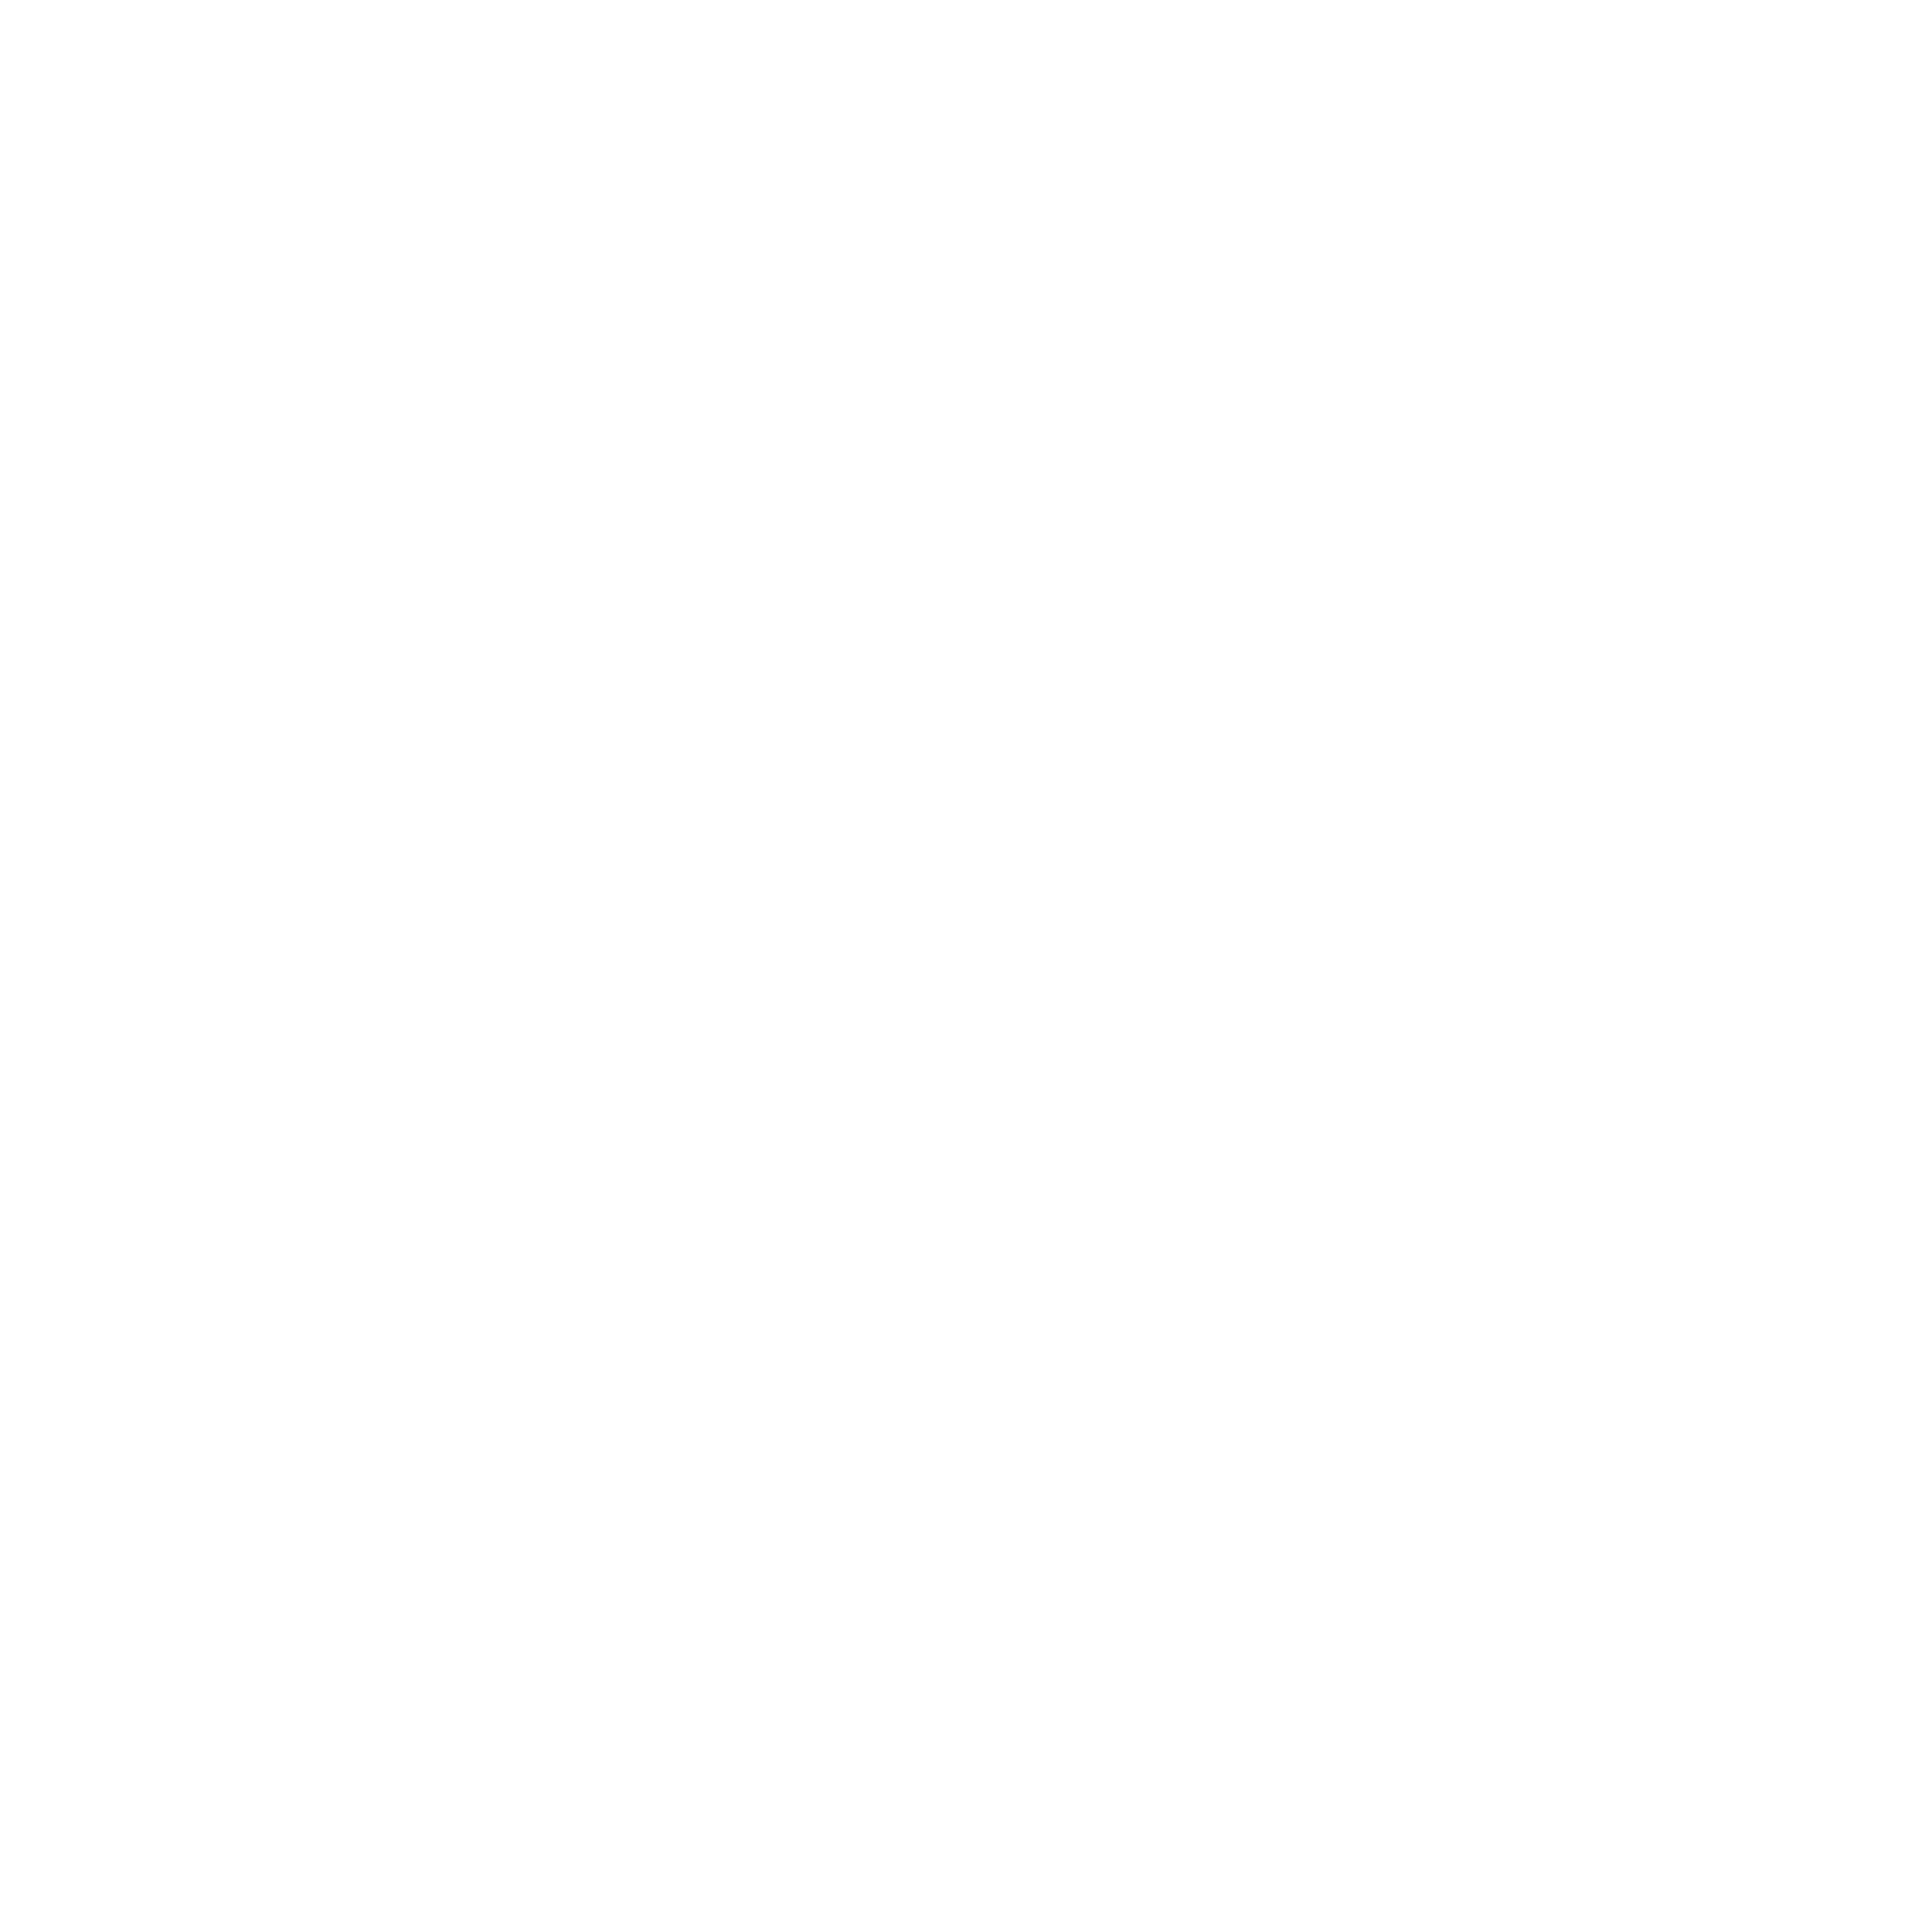

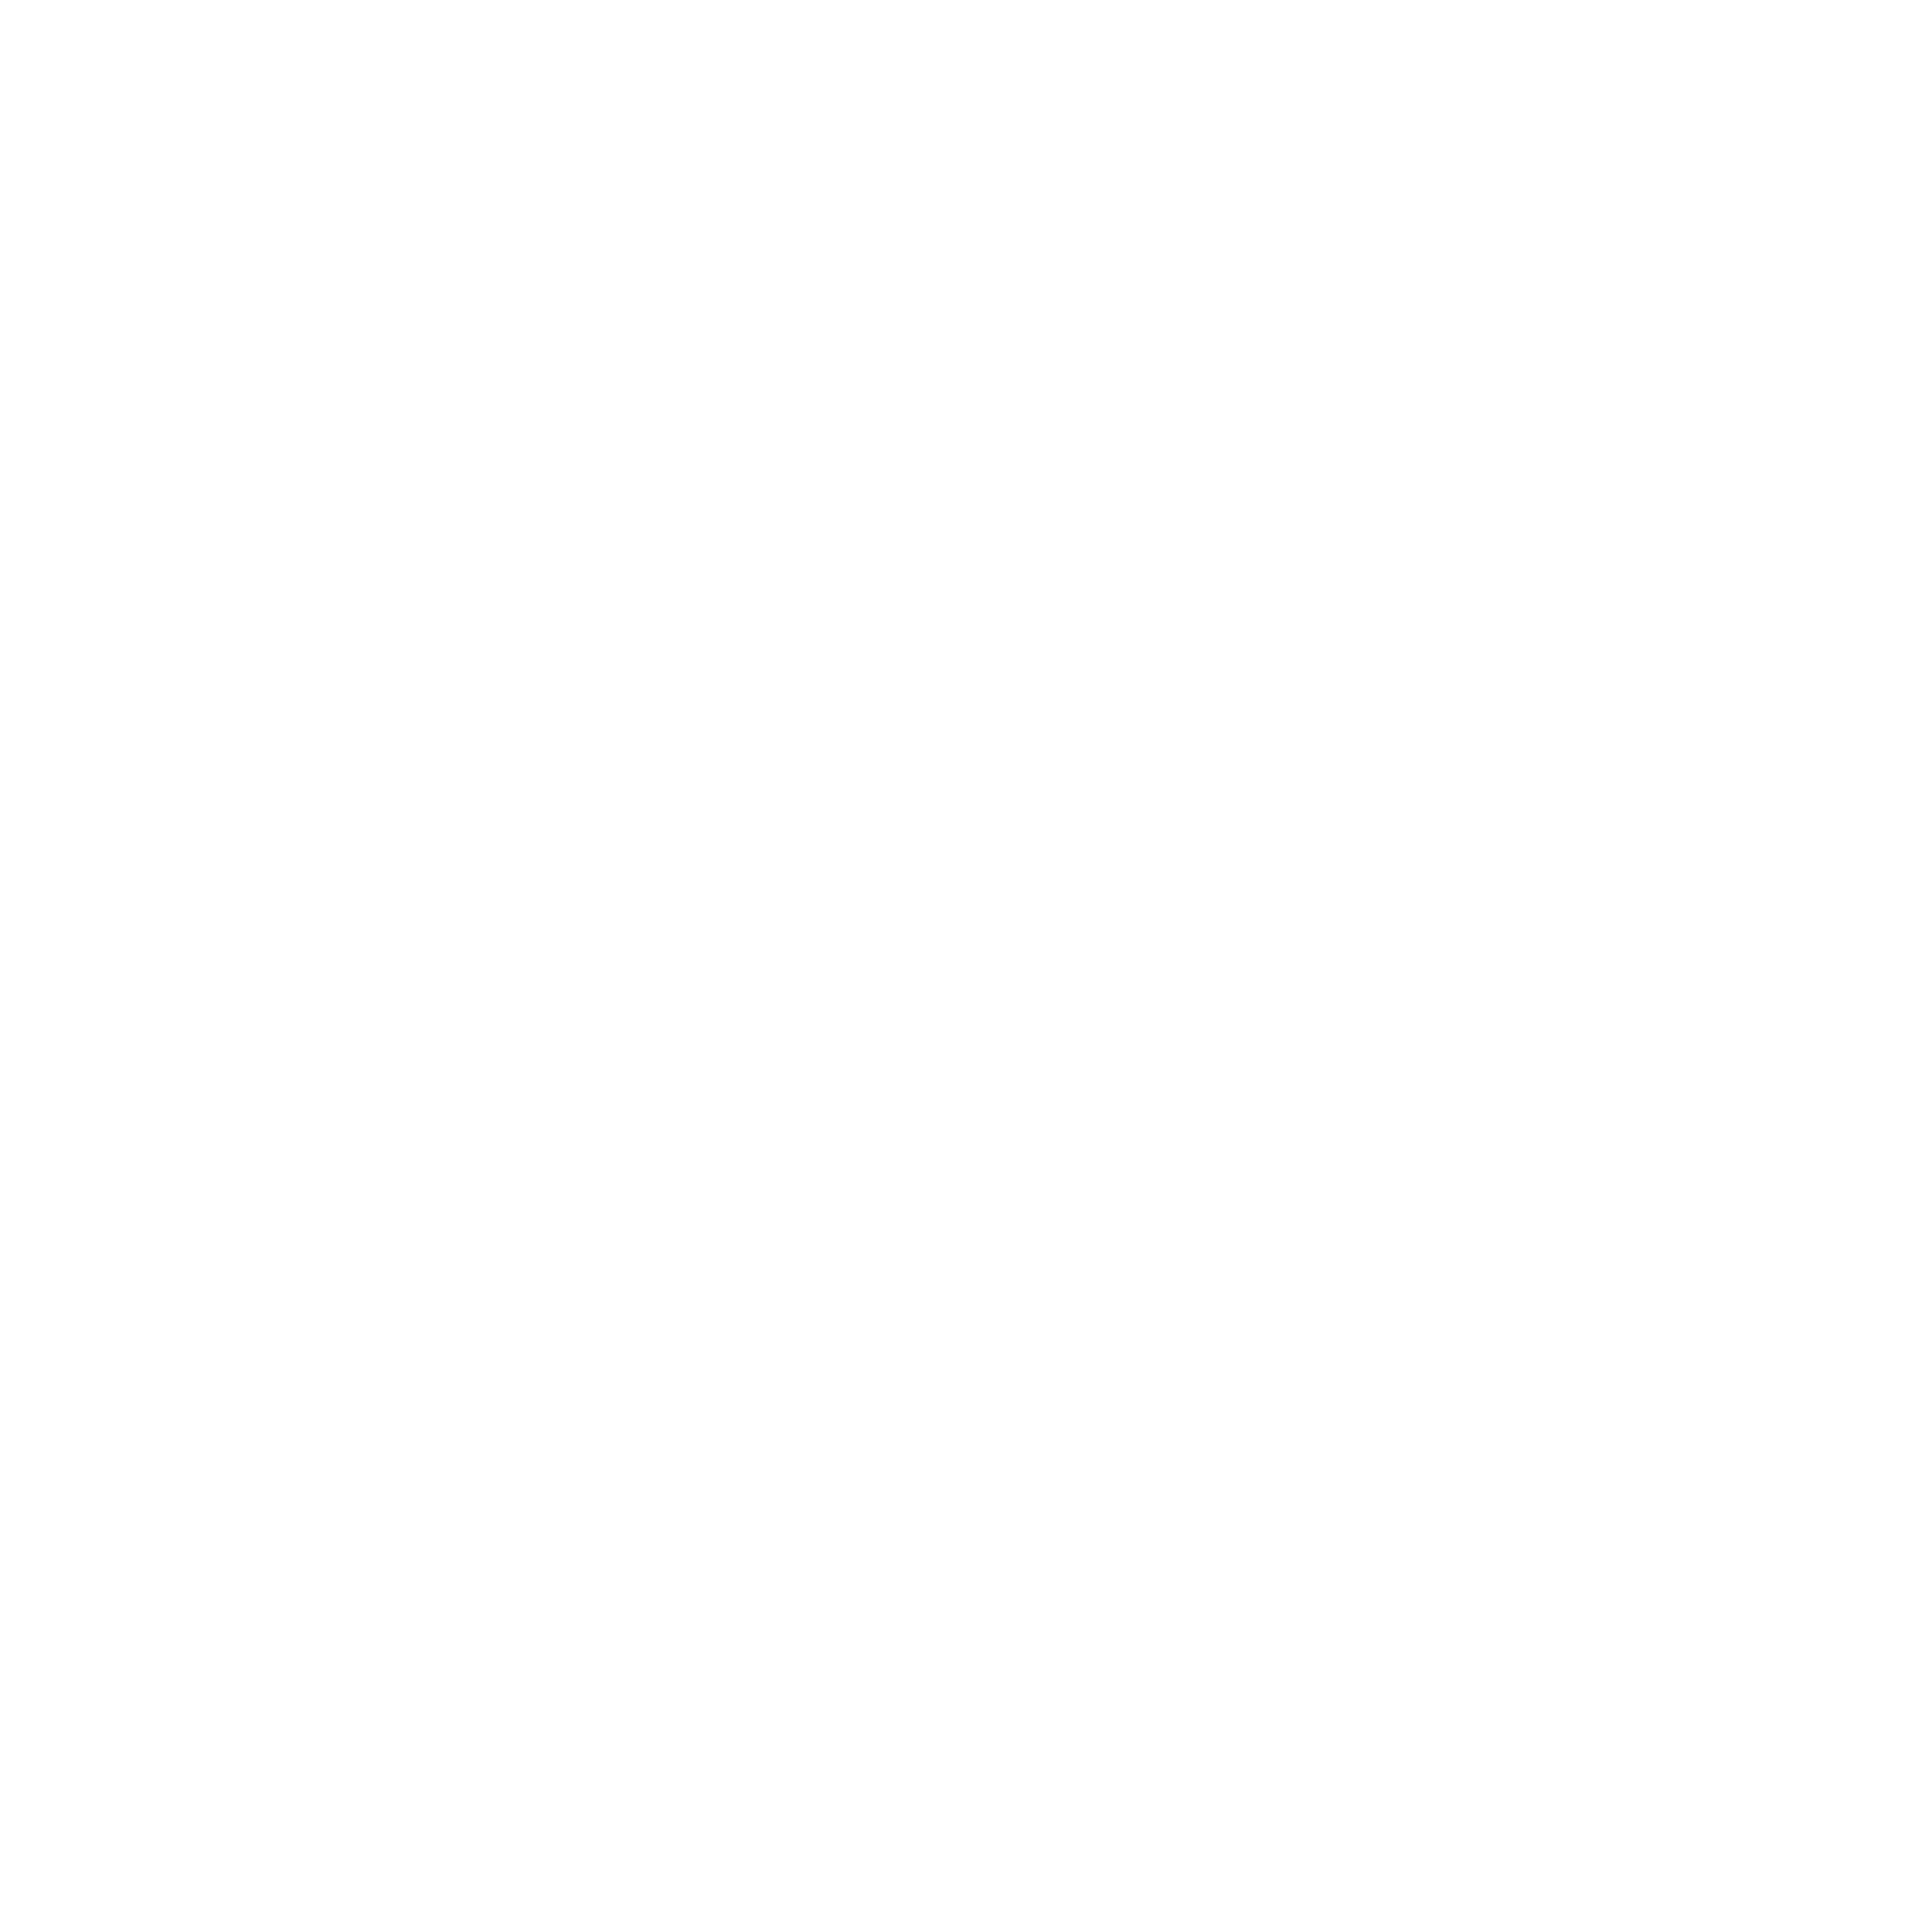

MemoryError: Unable to allocate 889. MiB for an array with shape (29135483, 4) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 864. MiB for an array with shape (28319971, 4) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 864. MiB for an array with shape (28314339, 4) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 216. MiB for an array with shape (28318772,) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 229. MiB for an array with shape (29981044,) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 213. MiB for an array with shape (27982863,) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 216. MiB for an array with shape (28301765,) and data type float64

<Figure size 6000x6000 with 1 Axes>

MemoryError: Unable to allocate 216. MiB for an array with shape (28328093,) and data type float64

<Figure size 6000x6000 with 1 Axes>

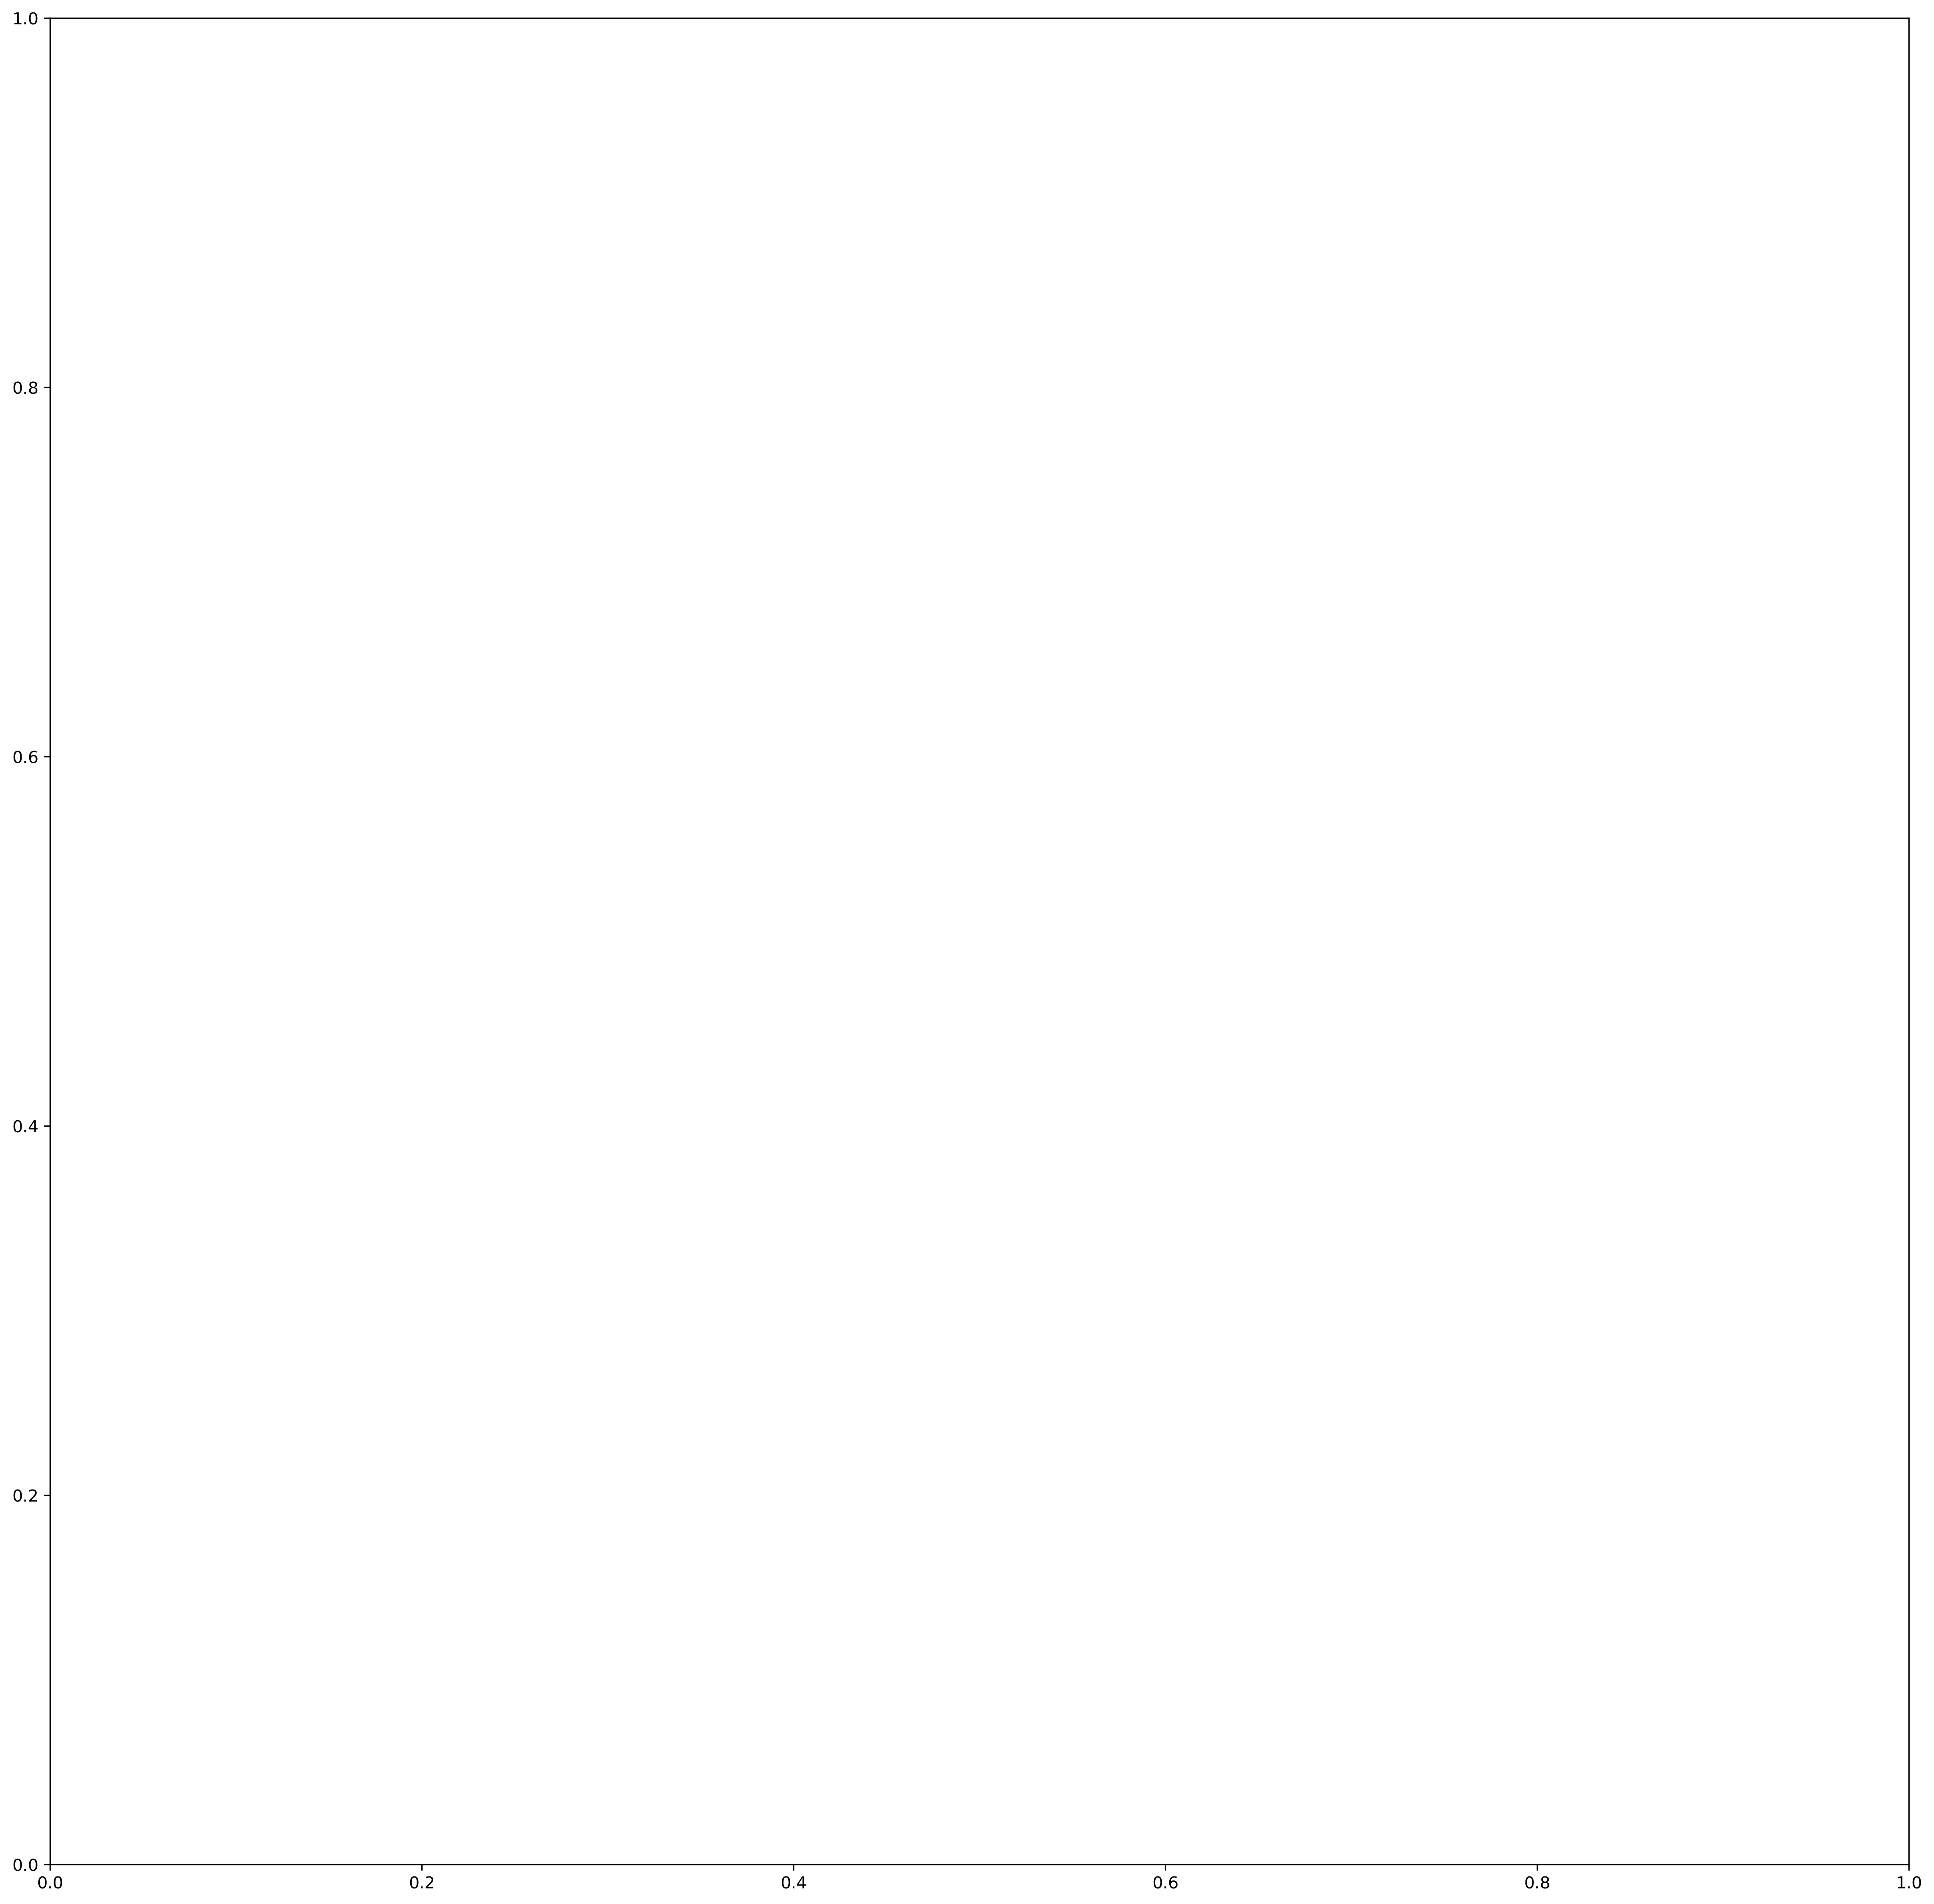

In [12]:
def main():
    #path_to_csv='C:/Users/patel1637/Downloads/nonPitsWithElevation_Manitoba_Copy.csv'
    path_to_csv='C:/Users/patel1637/Downloads/pitWithElevationMB.csv'
    pit_list=read_csv(path_to_csv)
#     print("pitlist",pit_list[:300])
    for a in pit_list[410:500]: #for now we will only do the first 300 pits as that is teh amount jaydeep has verified
        pit_limits=get_area(a)
        print("pit limits",pit_limits)
        query= f'SELECT * FROM geo_points WHERE long BETWEEN {pit_limits[2]} AND {pit_limits[3]} AND lat BETWEEN {pit_limits[0]} AND {pit_limits[1]};'
        pit_data= fetchdata(query)
        print("pitdata",pit_data[:10])
        print("pitdata length",len(pit_data))
        create_img(pit_data,a[1],a[0],a[2],pit_limits)
        gc.collect()
if __name__ == "__main__":
    main()


In [11]:
# query = 'SELECT long FROM geo_points LIMIT 10;'
# pit_data = fetchdata(query)
# print("pitdata", pit_data)


pitdata [(-95.69824064636101,), (-95.69785890920947,), (-95.69747717205794,), (-95.6970954349064,), (-95.69671369775486,), (-95.69633196060333,), (-95.69595022345179,), (-95.69556848630025,), (-95.69518674914872,), (-95.69480501199718,)]
